In [3]:
import numpy as np
from scipy.optimize import minimize
from scipy.optimize import differential_evolution
import time

import pandas as pd
from pyswarm import pso
from geneticalgorithm import geneticalgorithm as ga
from bees_algorithm import BeesAlgorithm

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from geneticalgorithm import geneticalgorithm as ga
from sklearn.metrics import f1_score

In [4]:
def newton_optimization(func, initial_guess, jac):
    result = minimize(func, initial_guess, method='Newton-CG', jac=jac)
    return result.fun

def pso_optimization(func, lb, ub, swarmsize=30, maxiter=100):
    result = pso(func, lb, ub, swarmsize=swarmsize, maxiter=maxiter)
    return result[1]

#Функция Розенброка
def f(x):
    return (1-x[0])**2 + 100*(x[1] - x[0]**2)**2

def jacobian(x):
    df_dx0 = -400 * x[0] * (-x[0]**2 + x[1]) + 2*x[0] - 2
    df_dx1 = -200 * x[0]**2 + 200 * x[1]
    return np.array([df_dx0, df_dx1])

def ga_optimization(func, dimension, variable_type_mixed, variable_boundaries, algorithm_parameters):
    start_time = time.time()
    model = ga(function=func, dimension=dimension, variable_type_mixed=variable_type_mixed,
               variable_boundaries=variable_boundaries, algorithm_parameters=algorithm_parameters)
    model.run()
    end_time = time.time()
    return model.best_function, end_time - start_time

In [5]:
lb = [-25, 1]
ub = [25, 2]
swarmsize = 30
maxiter = 100
tolerance = 1e-6

In [6]:
newton_results = []
pso_results = []

for _ in range(100):
    initial_guess = np.array([np.random.uniform(-25, 25), np.random.uniform(1, 2)])
    newton_result = newton_optimization(f, initial_guess, jacobian)
    pso_result = pso_optimization(f, lb, ub, swarmsize, maxiter)

    newton_results.append(newton_result)
    pso_results.append(pso_result)

newton_mean = np.mean(newton_results)
newton_variance = np.var(newton_results)

pso_mean = np.mean(pso_results)
pso_variance = np.var(pso_results)

print(f"Newton Algorithm - Mean: {newton_mean}, Variance: {newton_variance}")
print(f"PSO Algorithm - Mean: {pso_mean}, Variance: {pso_variance}")

Stopping search: Swarm best objective change less than 1e-08
Stopping search: Swarm best objective change less than 1e-08
Stopping search: Swarm best objective change less than 1e-08
Stopping search: Swarm best objective change less than 1e-08
Stopping search: Swarm best objective change less than 1e-08
Stopping search: Swarm best objective change less than 1e-08
Stopping search: maximum iterations reached --> 100
Stopping search: Swarm best objective change less than 1e-08
Stopping search: Swarm best objective change less than 1e-08
Stopping search: Swarm best objective change less than 1e-08
Stopping search: Swarm best objective change less than 1e-08
Stopping search: Swarm best objective change less than 1e-08
Stopping search: Swarm best objective change less than 1e-08
Stopping search: maximum iterations reached --> 100
Stopping search: Swarm best objective change less than 1e-08
Stopping search: Swarm best objective change less than 1e-08
Stopping search: Swarm best objective chan

In [7]:
def newton_cg_optimization(func, jac, initial_guess, tolerance=1e-6):
    start_time = time.time()
    result = minimize(func, initial_guess, method='Newton-CG', jac=jac, tol=tolerance)
    end_time = time.time()
    return result.fun, end_time - start_time

def pso_optimization(func, lb, ub, swarmsize=30, maxiter=100, tolerance=1e-6):
    start_time = time.time()
    result = pso(func, lb, ub, swarmsize=swarmsize, maxiter=maxiter, minfunc=tolerance)
    end_time = time.time()
    return result[1], end_time - start_time

newton_cg_times = []
pso_times = []

for _ in range(100):
    initial_guess = np.array([0, 0])
    newton_cg_result, newton_cg_time = newton_cg_optimization(f, jacobian, initial_guess, tolerance)
    pso_result, pso_time = pso_optimization(f, lb, ub, swarmsize, maxiter, tolerance)

    newton_cg_times.append(newton_cg_time)
    pso_times.append(pso_time)

newton_cg_mean_time = np.mean(newton_cg_times)
pso_mean_time = np.mean(pso_times)

print(f"Newton-CG Algorithm - Mean Time: {newton_cg_mean_time} seconds")
print(f"PSO Algorithm - Mean Time: {pso_mean_time} seconds")


Stopping search: Swarm best objective change less than 1e-06
Stopping search: Swarm best objective change less than 1e-06
Stopping search: Swarm best objective change less than 1e-06
Stopping search: Swarm best objective change less than 1e-06
Stopping search: Swarm best objective change less than 1e-06
Stopping search: Swarm best objective change less than 1e-06
Stopping search: Swarm best objective change less than 1e-06
Stopping search: Swarm best objective change less than 1e-06
Stopping search: Swarm best objective change less than 1e-06
Stopping search: Swarm best objective change less than 1e-06
Stopping search: Swarm best objective change less than 1e-06
Stopping search: Swarm best objective change less than 1e-06
Stopping search: Swarm best objective change less than 1e-06
Stopping search: Swarm best objective change less than 1e-06
Stopping search: Swarm best objective change less than 1e-06
Stopping search: Swarm best objective change less than 1e-06
Stopping search: Swarm b

In [8]:
def pso_optimization(func, lb, ub, swarmsize=30, maxiter=100):
    start_time = time.time()
    result = pso(func, lb, ub, swarmsize=swarmsize, maxiter=maxiter, minfunc=0, minstep=0)
    end_time = time.time()
    return result[1], end_time - start_time

pso_times = []
pso_values = []

for _ in range(100):
    pso_result, pso_time = pso_optimization(f, lb, ub, swarmsize, maxiter)

    pso_times.append(pso_time)
    pso_values.append(pso_result)

pso_mean_time = np.mean(pso_times)
pso_variance_time = np.var(pso_times)

pso_mean_value = np.mean(pso_values)
pso_variance_value = np.var(pso_values)

print(f"PSO Algorithm - Mean Time: {pso_mean_time} seconds, Variance Time: {pso_variance_time}")
print(f"PSO Algorithm - Mean Value: {pso_mean_value}, Variance Value: {pso_variance_value}")


Stopping search: maximum iterations reached --> 100
Stopping search: maximum iterations reached --> 100
Stopping search: maximum iterations reached --> 100
Stopping search: maximum iterations reached --> 100
Stopping search: maximum iterations reached --> 100
Stopping search: maximum iterations reached --> 100
Stopping search: maximum iterations reached --> 100
Stopping search: maximum iterations reached --> 100
Stopping search: maximum iterations reached --> 100
Stopping search: maximum iterations reached --> 100
Stopping search: maximum iterations reached --> 100
Stopping search: maximum iterations reached --> 100
Stopping search: maximum iterations reached --> 100
Stopping search: maximum iterations reached --> 100
Stopping search: maximum iterations reached --> 100
Stopping search: maximum iterations reached --> 100
Stopping search: maximum iterations reached --> 100
Stopping search: maximum iterations reached --> 100
Stopping search: maximum iterations reached --> 100
Stopping sea

 The best solution found:                                                                           
 [1.34315729 1.80347362]

 Objective function:
 0.11779267547088056


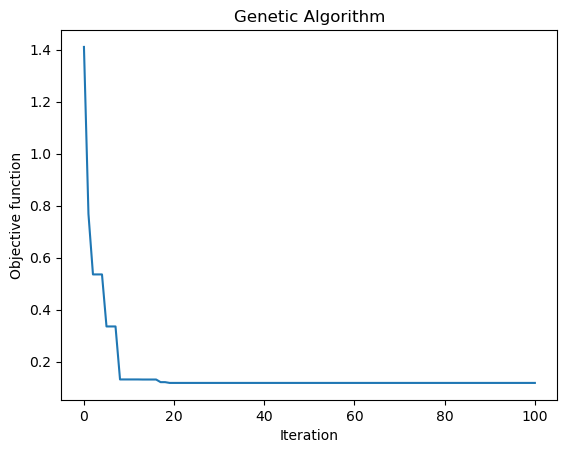

 The best solution found:                                                                           
 [1.42336415 1.99632516]

 Objective function:
 0.2670922468932192


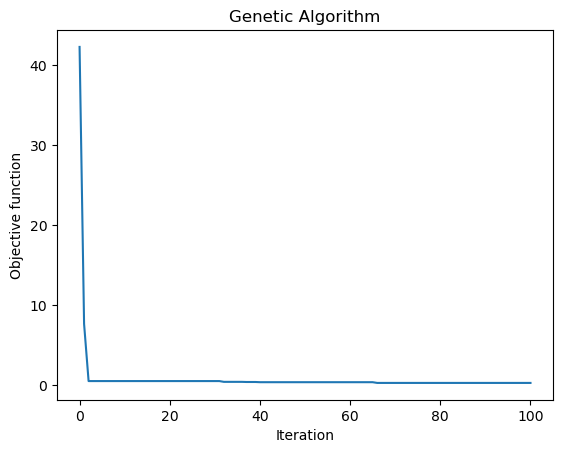

 The best solution found:                                                                           
 [-0.77533863  1.00148904]

 Objective function:
 19.178961953838215


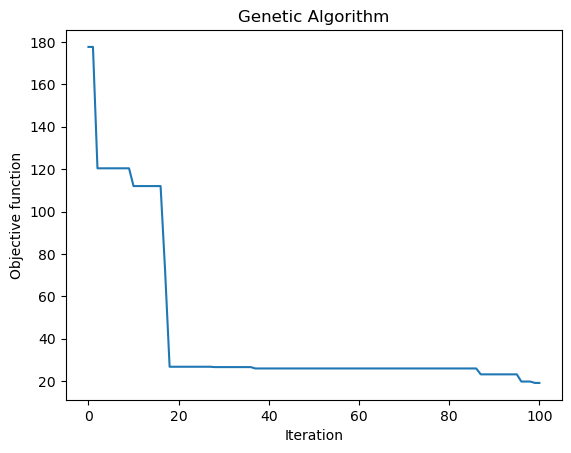

 The best solution found:                                                                           
 [-1.36488882  1.85762824]

 Objective function:
 5.5955009705623615


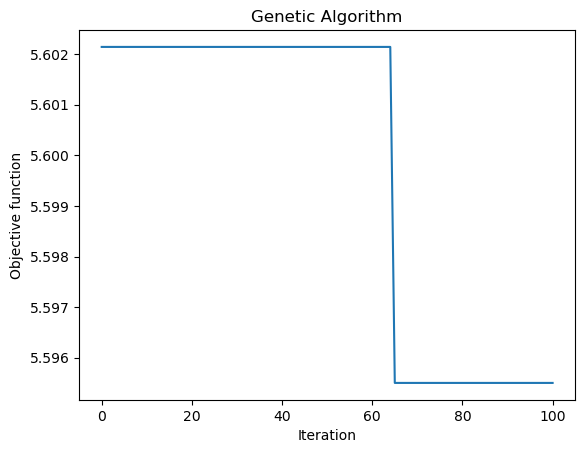

 The best solution found:                                                                           
 [1.05589956 1.11395358]

 Objective function:
 0.0032189089109509903


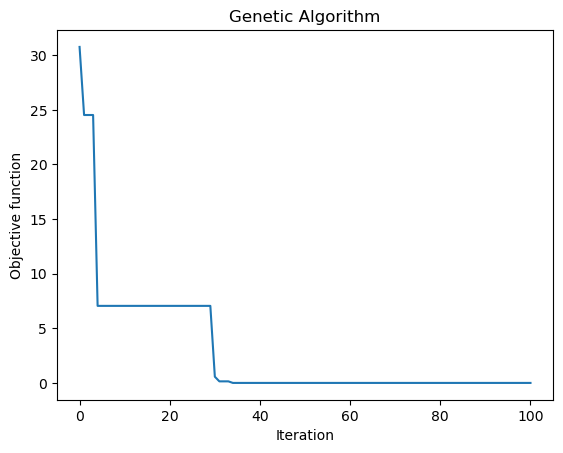

 The best solution found:                                                                           
 [-0.96341338  1.01468638]

 Objective function:
 4.603581129860141


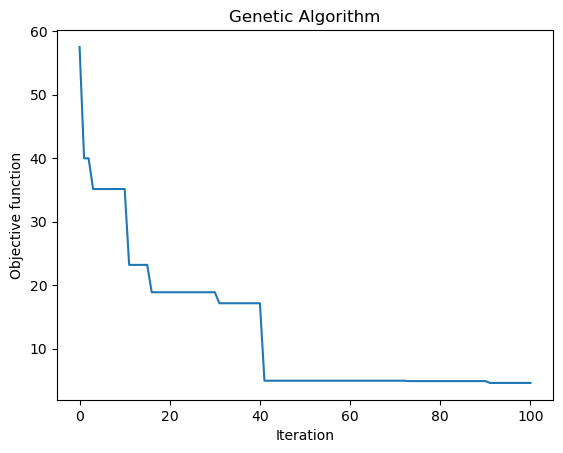

 The best solution found:                                                                           
 [1.23025502 1.51292329]

 Objective function:
 0.053053873464293556


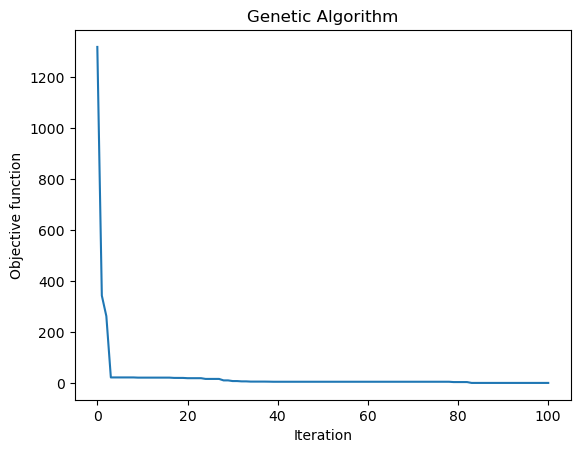

 The best solution found:                                                                           
 [1.32715618 1.75815543]

 Objective function:
 0.10804755740551154


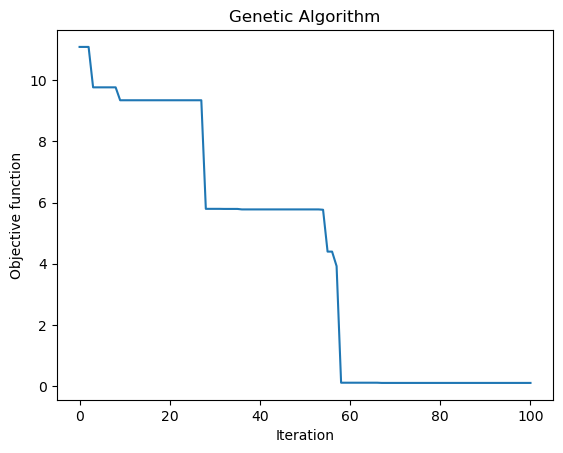

 The best solution found:                                                                           
 [1.34058686 1.7965551 ]

 Objective function:
 0.11603760072855733


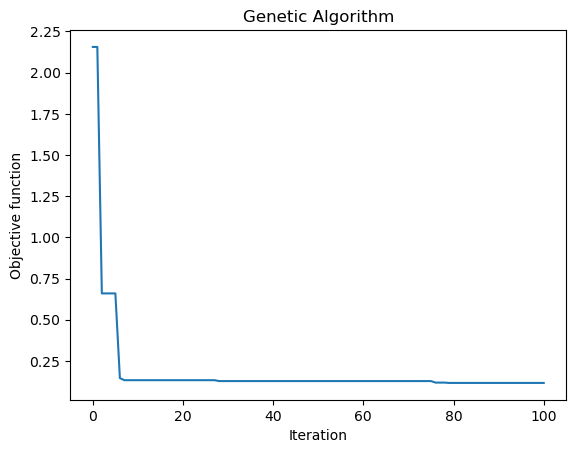

 The best solution found:                                                                           
 [-0.89655474  1.00559634]

 Objective function:
 7.668676257132065


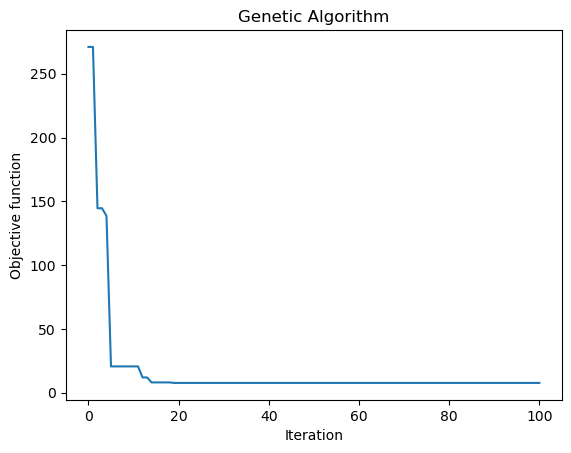

 The best solution found:                                                                           
 [1.24311555 1.54283381]

 Objective function:
 0.05973139117654981


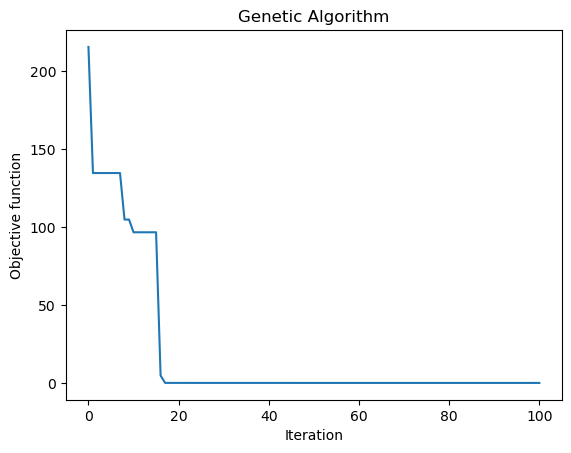

 The best solution found:                                                                           
 [1.22885698 1.51052834]

 Objective function:
 0.05239477631754421


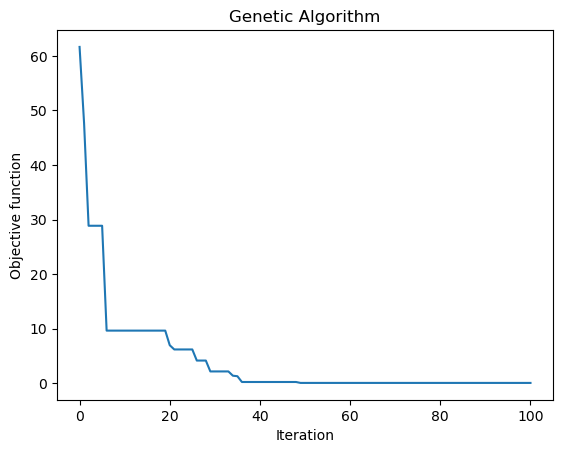

 The best solution found:                                                                           
 [-1.27422541  1.62292973]

 Objective function:
 5.172153132516066


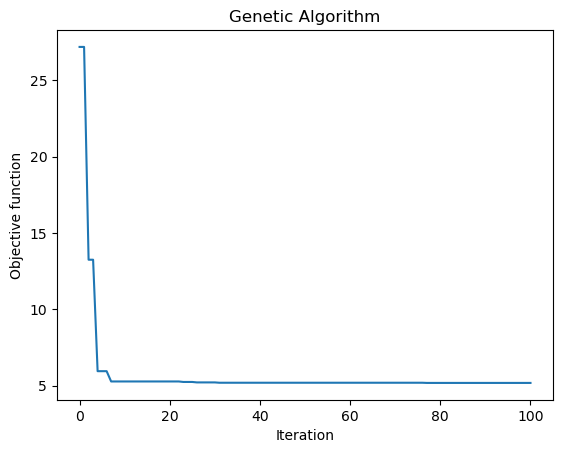

 The best solution found:                                                                           
 [0.95475199 1.0044749 ]

 Objective function:
 0.8655257418674934


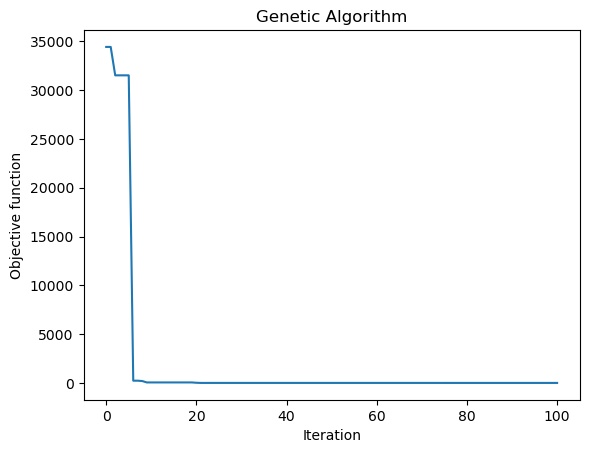

 The best solution found:                                                                           
 [-1.11463291  1.24968343]

 Objective function:
 4.476967681140703


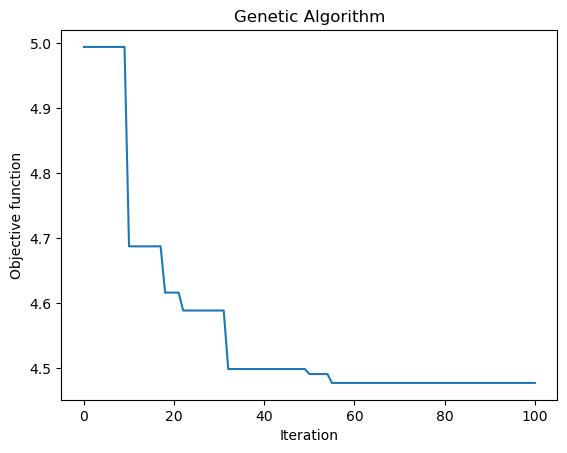

 The best solution found:                                                                           
 [-1.02299291  1.05235259]

 Objective function:
 4.095908643056796


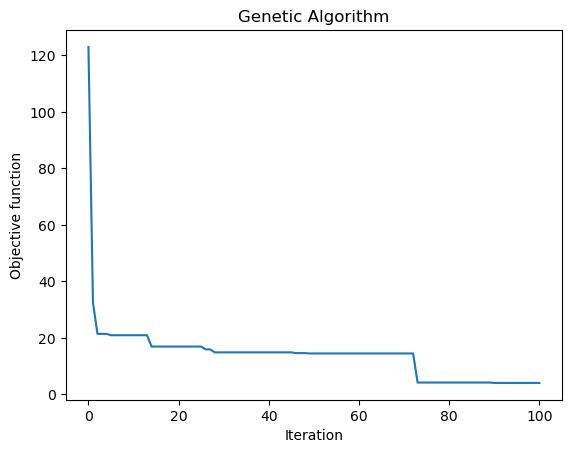

 The best solution found:                                                                           
 [1.06836077 1.14085024]

 Objective function:
 0.004702841705895733


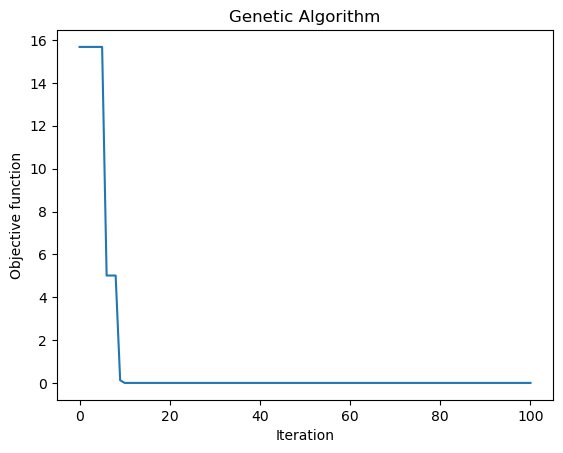

 The best solution found:                                                                           
 [1.29487585 1.67007193]

 Objective function:
 0.09134948837009356


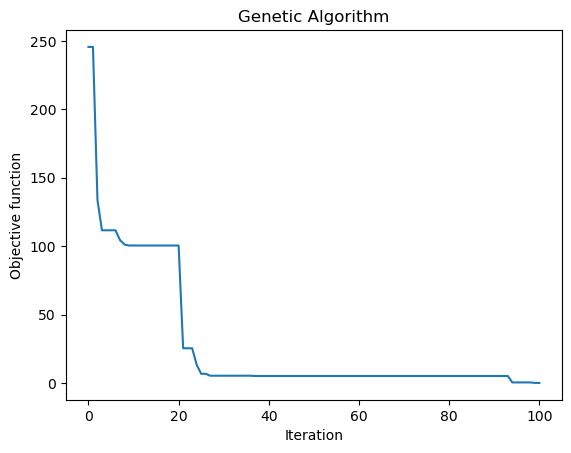

 The best solution found:                                                                           
 [-1.10011924  1.21213964]

 Objective function:
 4.410853232665393


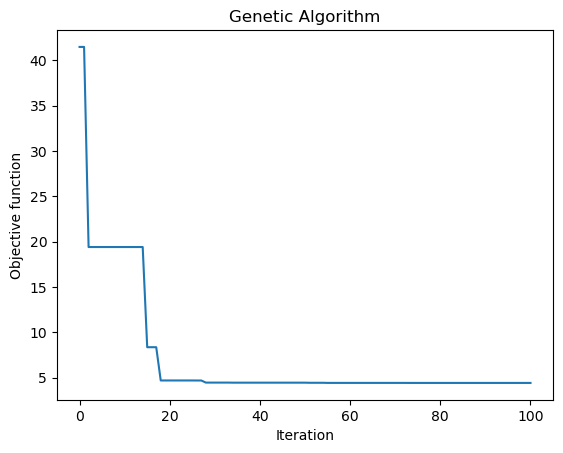

 The best solution found:                                                                           
 [1.3139786  1.73492504]

 Objective function:
 0.10561384112441569


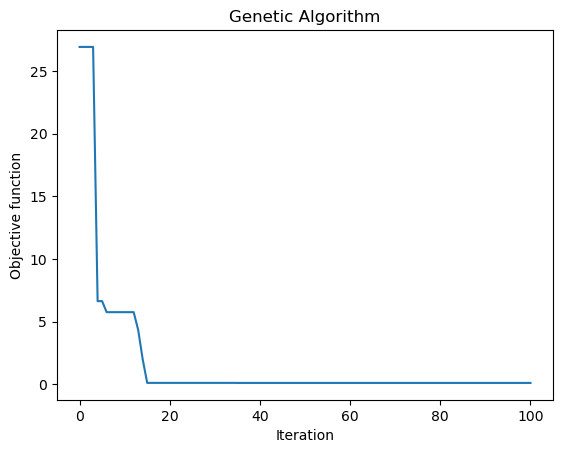

 The best solution found:                                                                           
 [0.99891289 1.01548593]

 Objective function:
 0.031185069310790275


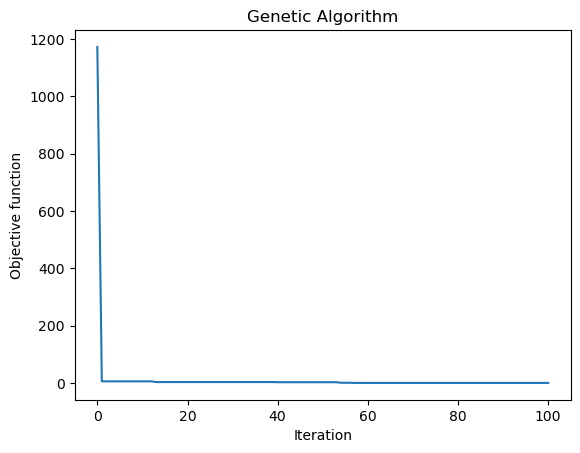

 The best solution found:                                                                           
 [1.02527041 1.05029249]

 Objective function:
 0.0007172542177125101


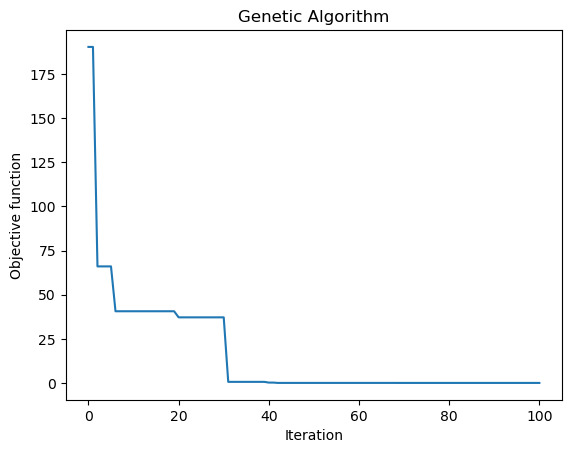

 The best solution found:                                                                           
 [0.93161233 1.00298961]

 Objective function:
 1.82955564051798


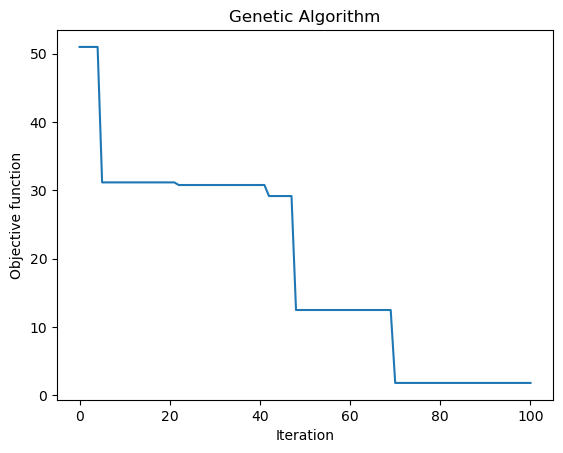

 The best solution found:                                                                           
 [-1.00043476  1.00974525]

 Objective function:
 4.009616751240266


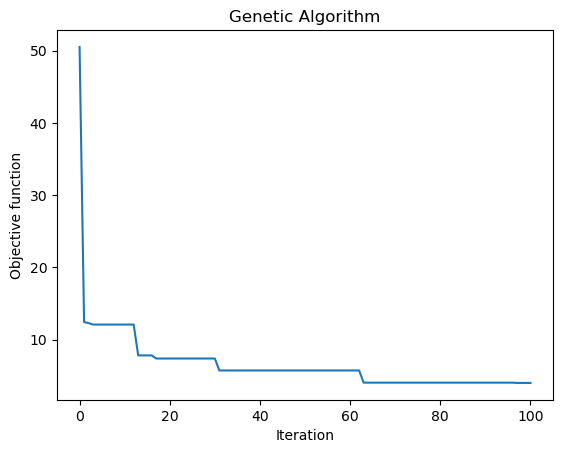

 The best solution found:                                                                           
 [1.22776764 1.50760833]

 Objective function:
 0.05188189716545513


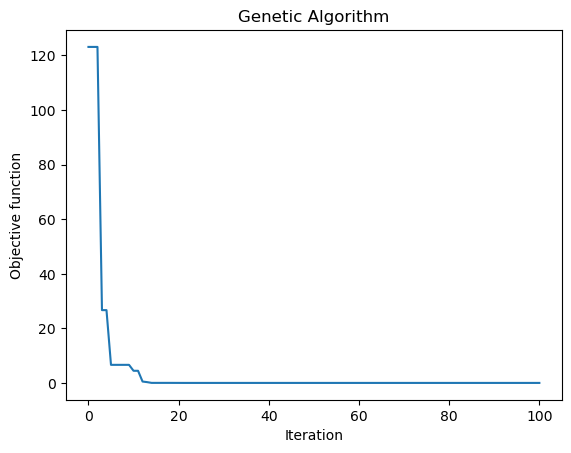

 The best solution found:                                                                           
 [0.9772201  1.00098673]

 Objective function:
 0.21237290609038173


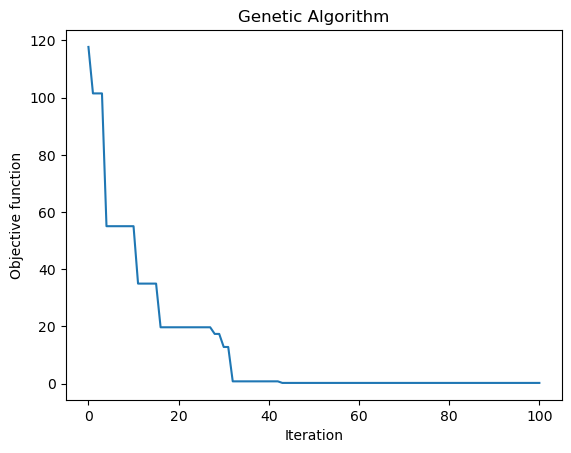

 The best solution found:                                                                           
 [1.02116945 1.04034197]

 Objective function:
 0.0010459806964831777


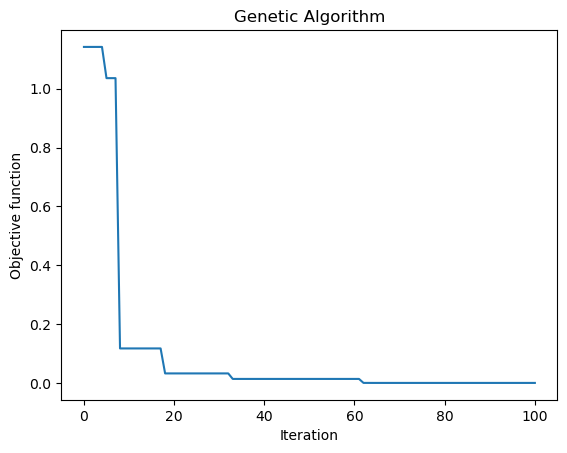

 The best solution found:                                                                           
 [1.38282253 1.92384948]

 Objective function:
 0.16012844174305071


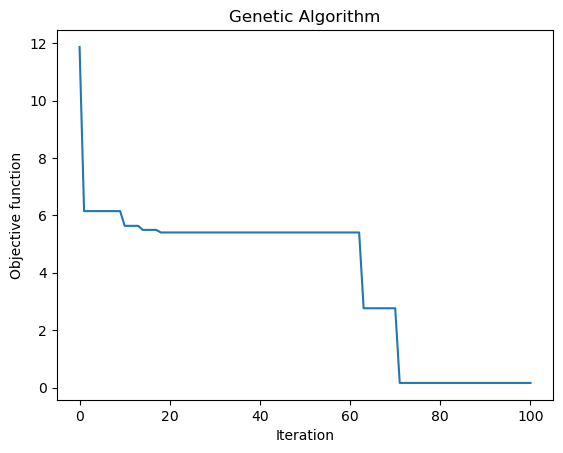

 The best solution found:                                                                           
 [1.20487328 1.45129334]

 Objective function:
 0.04199123300250543


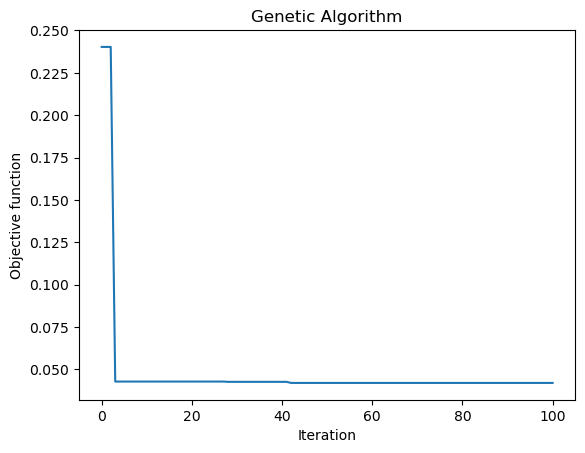

 The best solution found:                                                                           
 [-1.33368857  1.77894136]

 Objective function:
 5.446107023826724


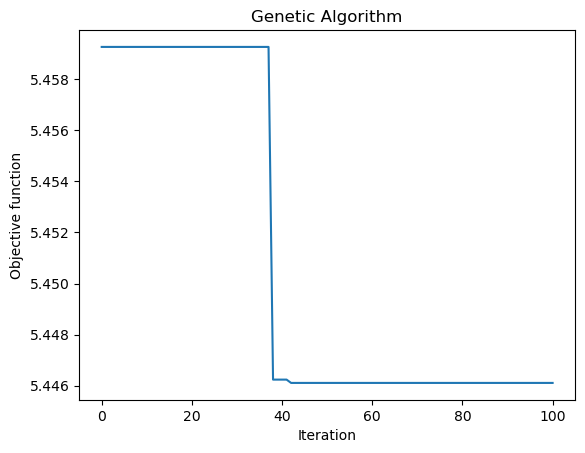

 The best solution found:                                                                           
 [1.03041651 1.04446664]

 Objective function:
 0.030824872939004756


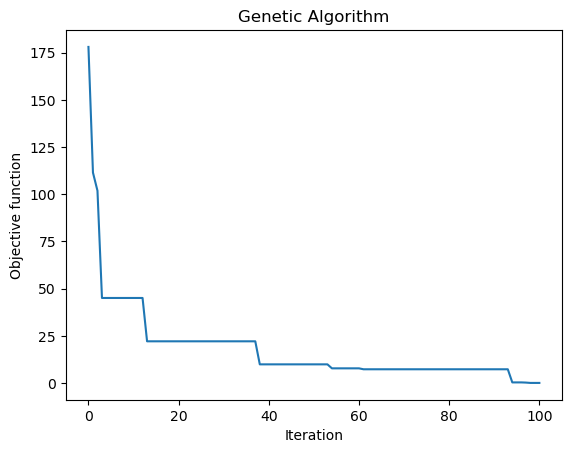

 The best solution found:                                                                           
 [1.1043747  1.21856599]

 Objective function:
 0.011010177300035584


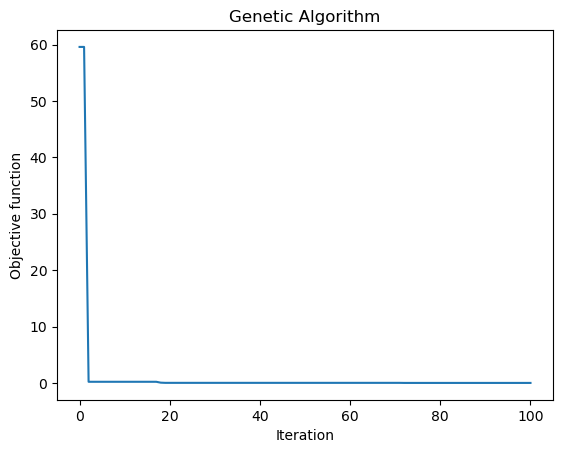

 The best solution found:                                                                           
 [-1.19467968  1.42739427]

 Objective function:
 4.816620718343519


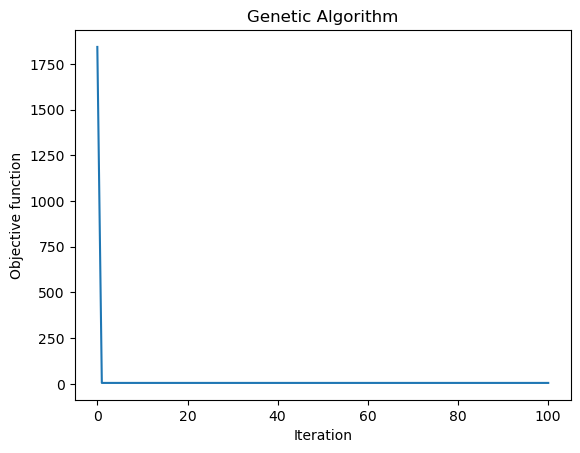

 The best solution found:                                                                           
 [1.35195732 1.82827272]

 Objective function:
 0.12389739199900805


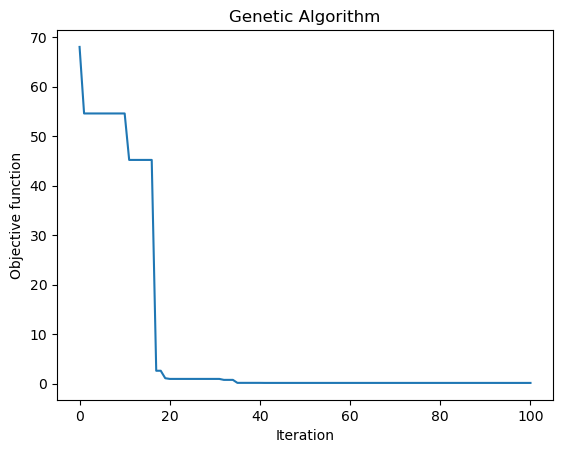

 The best solution found:                                                                           
 [1.19475896 1.4236109 ]

 Objective function:
 0.039404122609036016


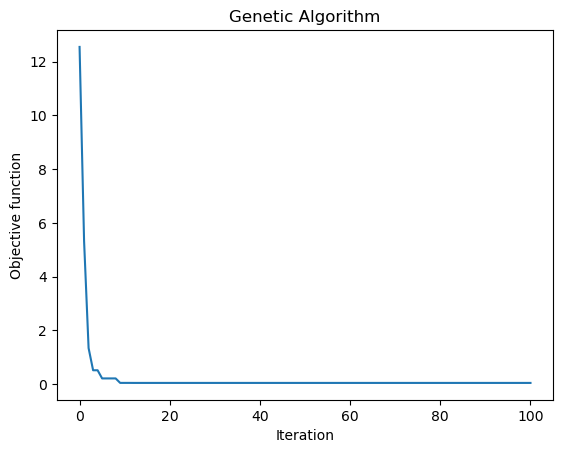

 The best solution found:                                                                           
 [-0.97941921  1.00053304]

 Objective function:
 4.0884303632486025


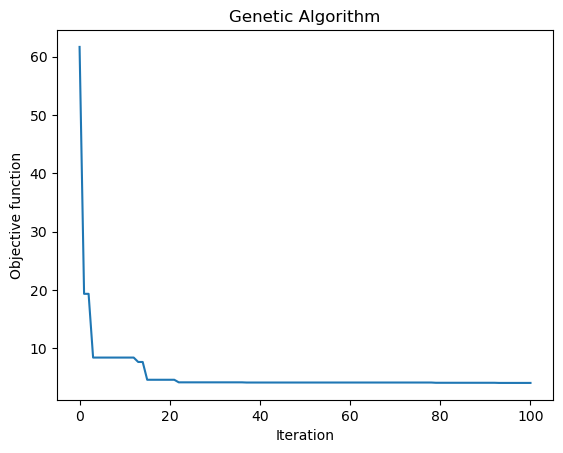

 The best solution found:                                                                           
 [1.32112643 1.74533143]

 Objective function:
 0.10312237706927996


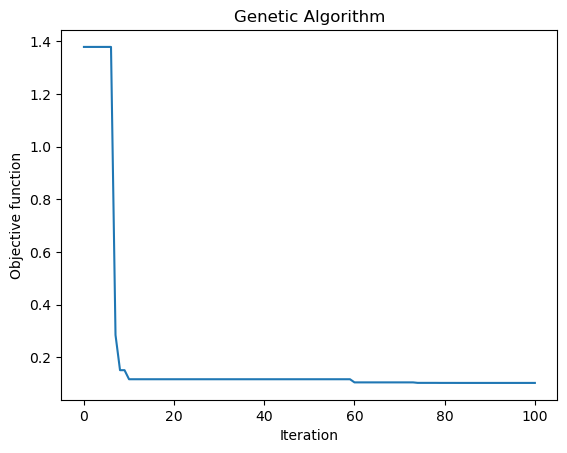

 The best solution found:                                                                           
 [1.20350242 1.44738425]

 Objective function:
 0.04152011114766081


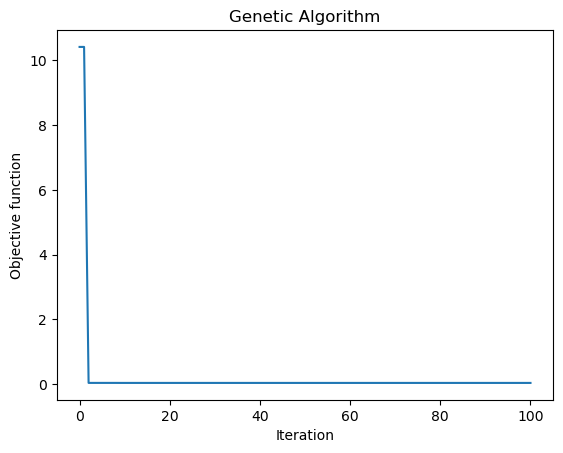

 The best solution found:                                                                           
 [-1.00434109  1.01408453]

 Objective function:
 4.020281421090606


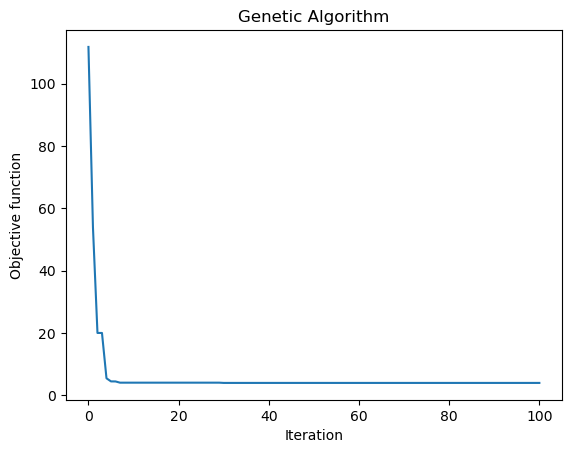

 The best solution found:                                                                           
 [1.41779135 1.98308698]

 Objective function:
 0.24769457577090415


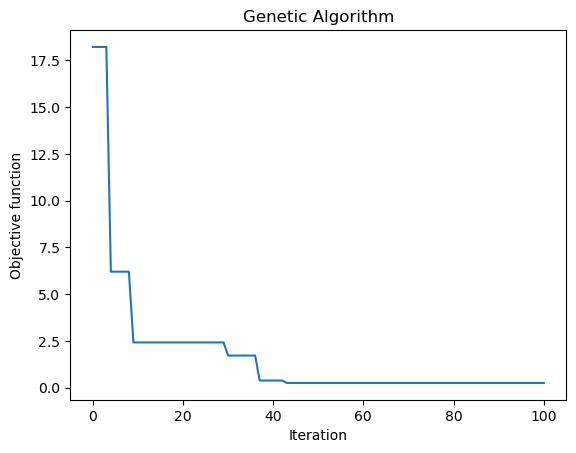

 The best solution found:                                                                           
 [1.00964925 1.02699775]

 Objective function:
 0.0058784662088591086


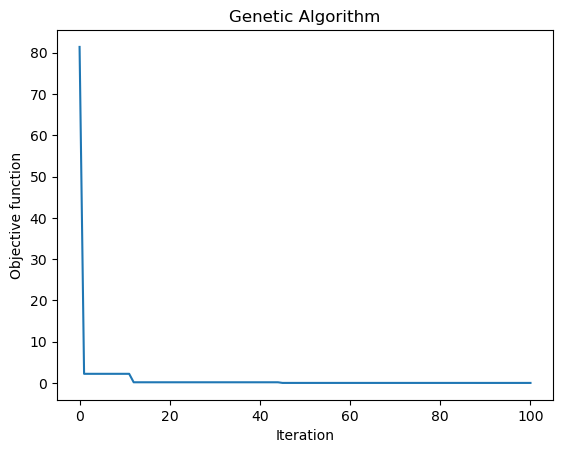

 The best solution found:                                                                           
 [1.24769526 1.55688802]

 Objective function:
 0.06135503173049553


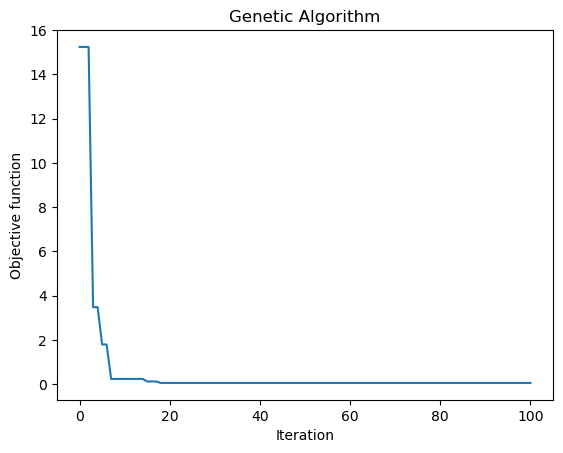

 The best solution found:                                                                           
 [-1.09432173  1.19447831]

 Objective function:
 4.387120945501592


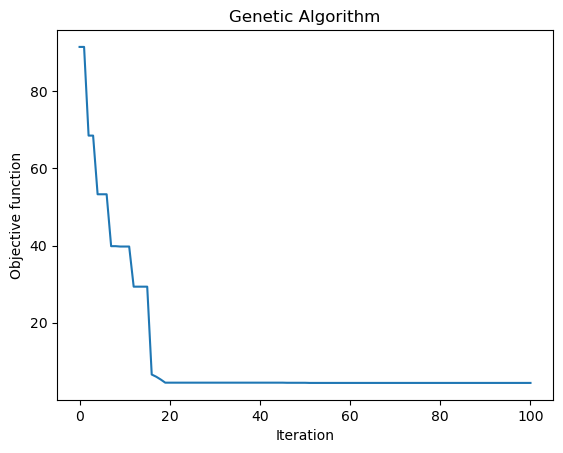

 The best solution found:                                                                           
 [1.14190644 1.30234428]

 Objective function:
 0.02039537611990046


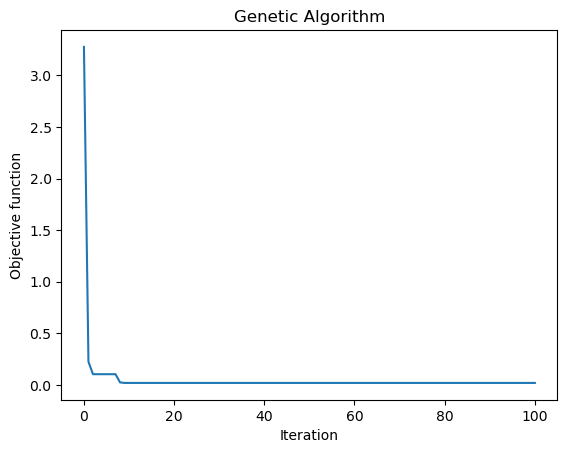

 The best solution found:                                                                           
 [-1.42852604  1.99006636]

 Objective function:
 6.153980044455624


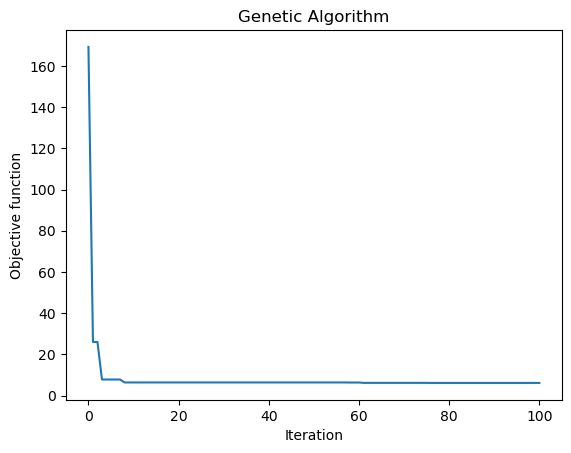

 The best solution found:                                                                           
 [0.89306153 1.00354902]

 Objective function:
 4.254628859959905


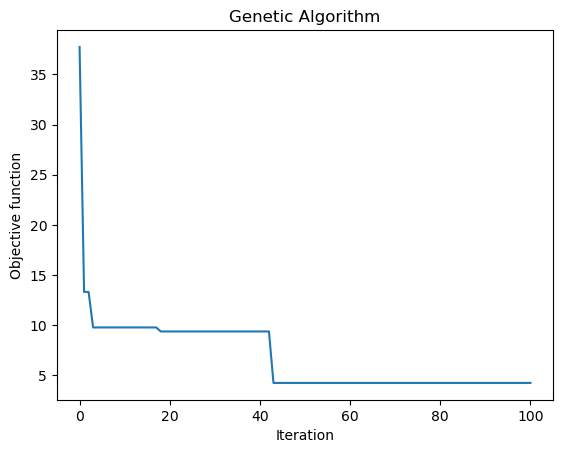

 The best solution found:                                                                           
 [1.06202294 1.11882521]

 Objective function:
 0.012068825609559974


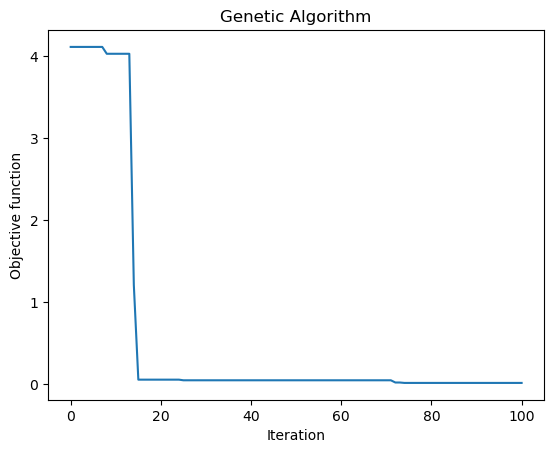

 The best solution found:                                                                           
 [1.17411716 1.37519744]

 Objective function:
 0.0314414963360348


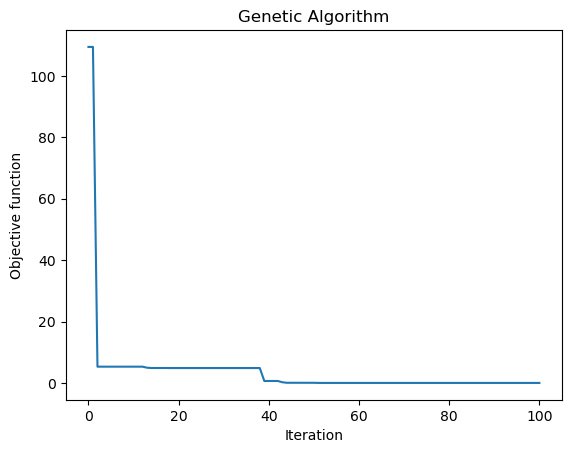

 The best solution found:                                                                           
 [1.0167851  1.05021135]

 Objective function:
 0.027044732908627425


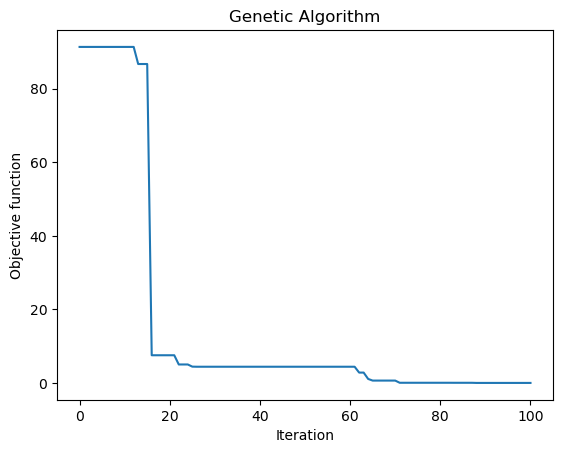

 The best solution found:                                                                           
 [-1.35052198  1.82410675]

 Objective function:
 5.524957476797979


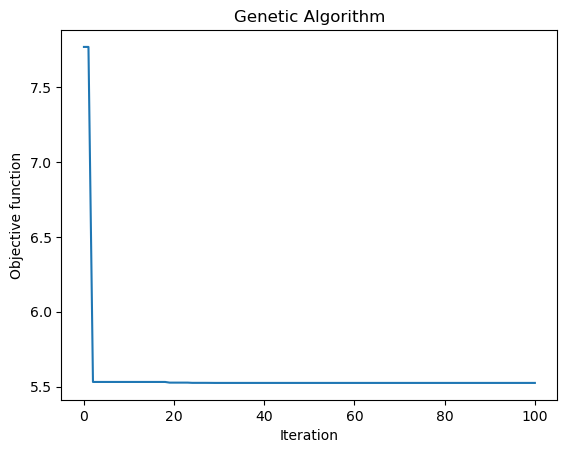

 The best solution found:                                                                           
 [-1.3455793   1.80966161]

 Objective function:
 5.5018272776407615


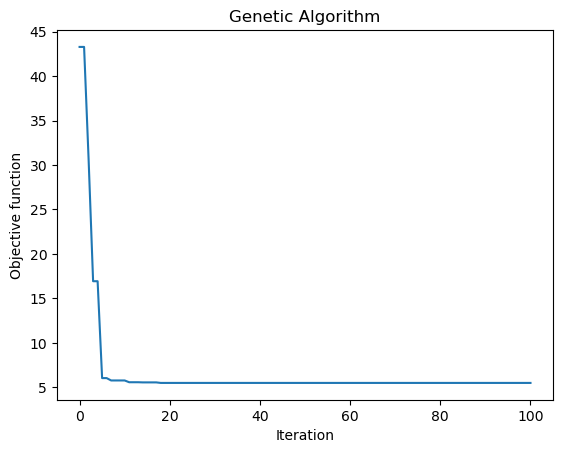

 The best solution found:                                                                           
 [1.17500697 1.37966715]

 Objective function:
 0.030722348937086925


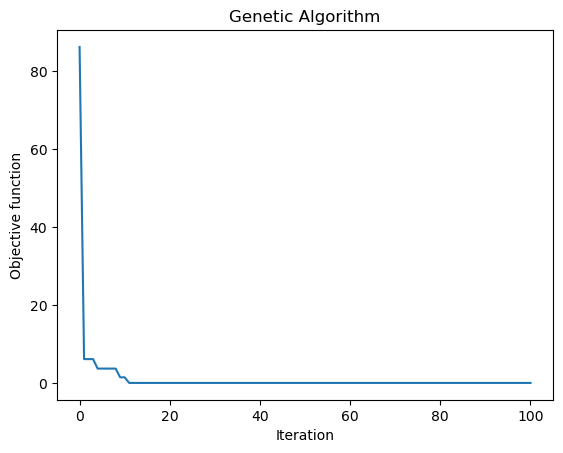

 The best solution found:                                                                           
 [1.13791932 1.29463454]

 Objective function:
 0.01902683874740526


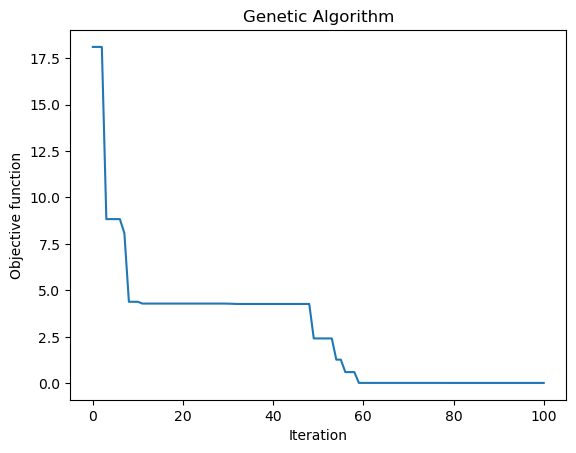

 The best solution found:                                                                           
 [1.32152011 1.74553373]

 Objective function:
 0.10345291894433899


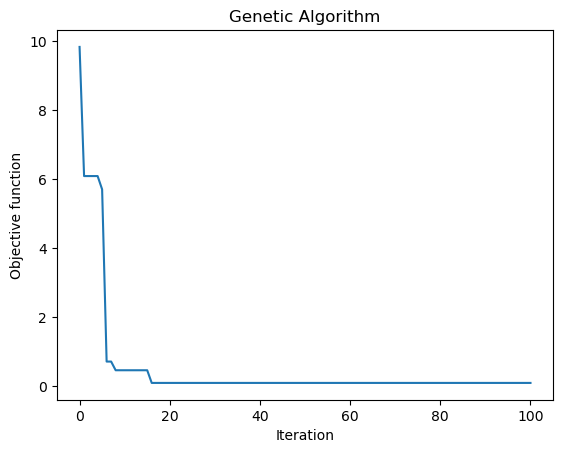

 The best solution found:                                                                           
 [1.2561877  1.57407008]

 Objective function:
 0.06718249058241432


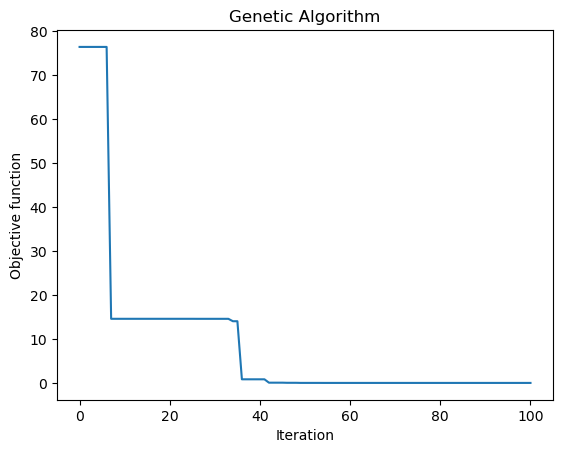

 The best solution found:                                                                           
 [1.41021596 1.97780737]

 Objective function:
 0.18016181605303241


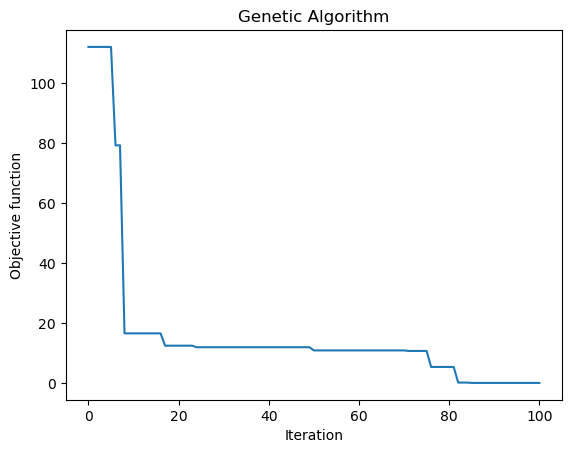

 The best solution found:                                                                           
 [-1.15794671  1.33901021]

 Objective function:
 4.657069040009883


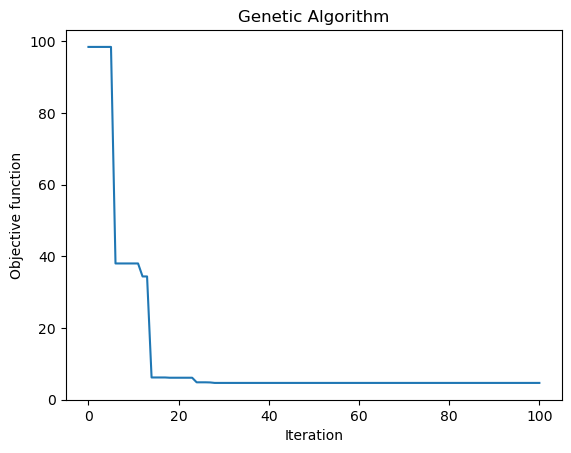

 The best solution found:                                                                           
 [1.04994837 1.10151088]

 Objective function:
 0.002572403363751673


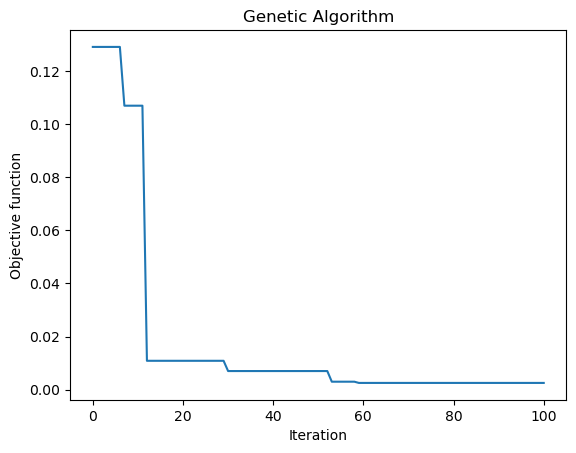

 The best solution found:                                                                           
 [1.3693008  1.87803168]

 Objective function:
 0.13731150036002832


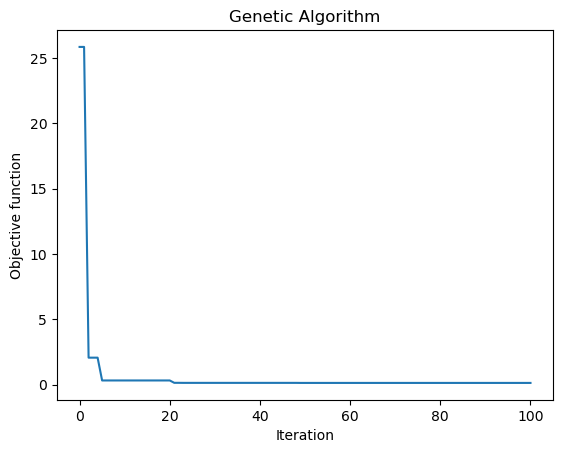

 The best solution found:                                                                           
 [-1.15466276  1.33567765]

 Objective function:
 4.643162863562324


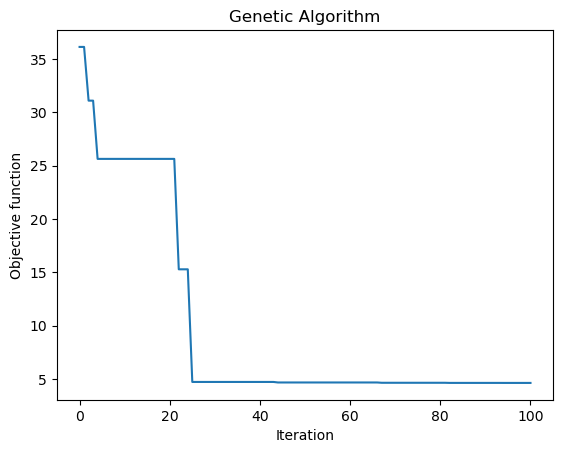

 The best solution found:                                                                           
 [1.02484924 1.04648374]

 Objective function:
 0.002086080627526861


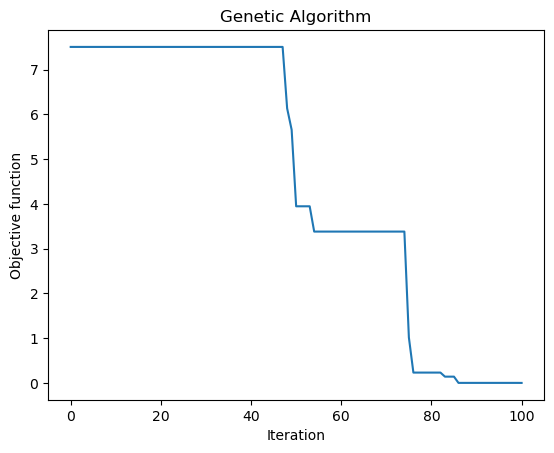

 The best solution found:                                                                           
 [1.19565437 1.43084711]

 Objective function:
 0.03843882128699207


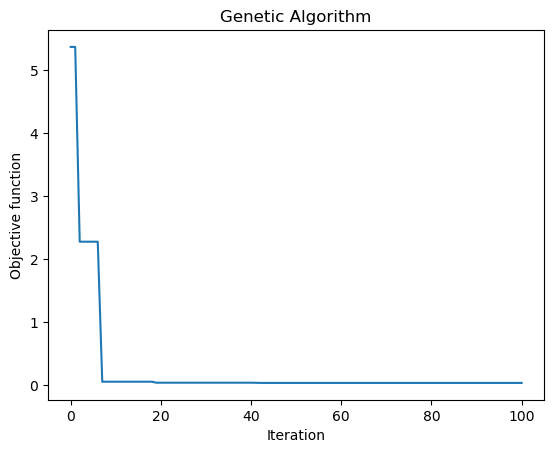

 The best solution found:                                                                           
 [-1.29914412  1.68717746]

 Objective function:
 5.286099435802102


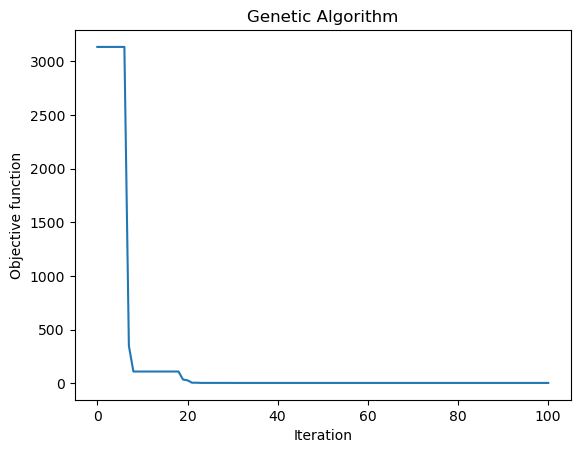

 The best solution found:                                                                           
 [0.95765244 1.02003207]

 Objective function:
 1.0613318270206276


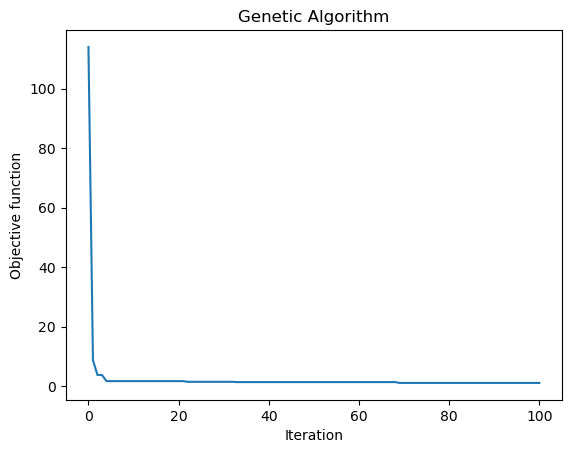

 The best solution found:                                                                           
 [1.01508059 1.03168105]

 Objective function:
 0.00039446673074046787


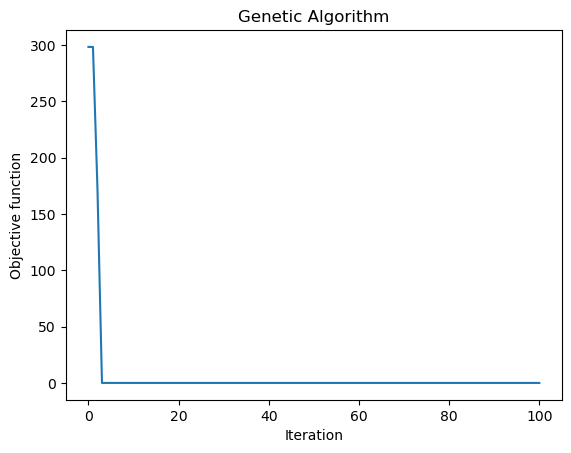

 The best solution found:                                                                           
 [-1.12086536  1.32192014]

 Objective function:
 4.928156537586953


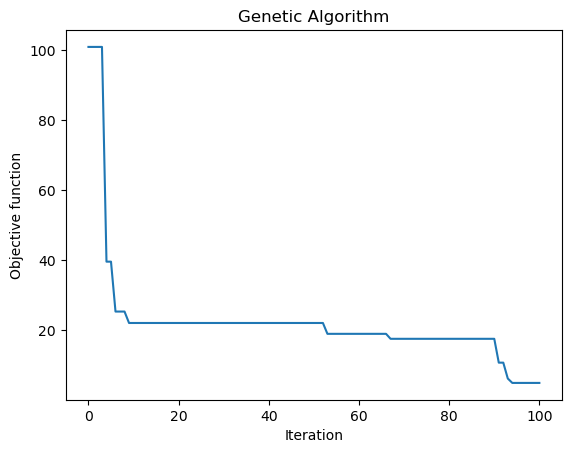

 The best solution found:                                                                           
 [1.03938355 1.08012469]

 Objective function:
 0.001554806501480183


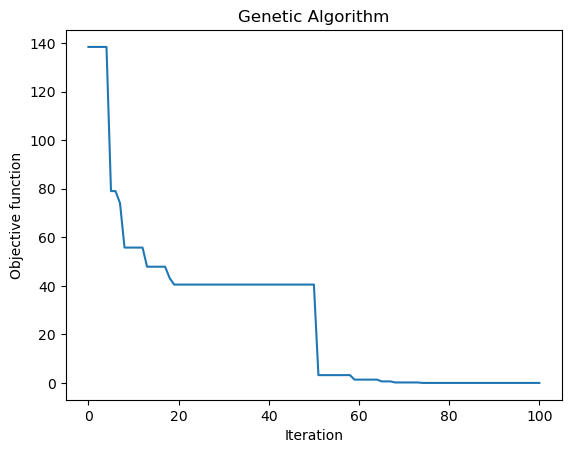

 The best solution found:                                                                           
 [1.31966865 1.7429454 ]

 Objective function:
 0.10238970147686545


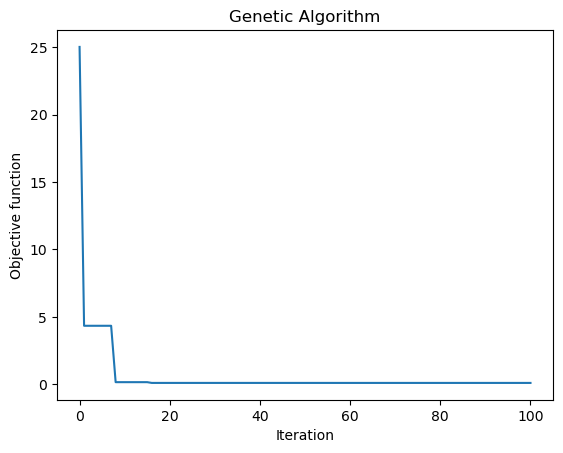

 The best solution found:                                                                           
 [1.16755253 1.36325421]

 Objective function:
 0.028074416300124336


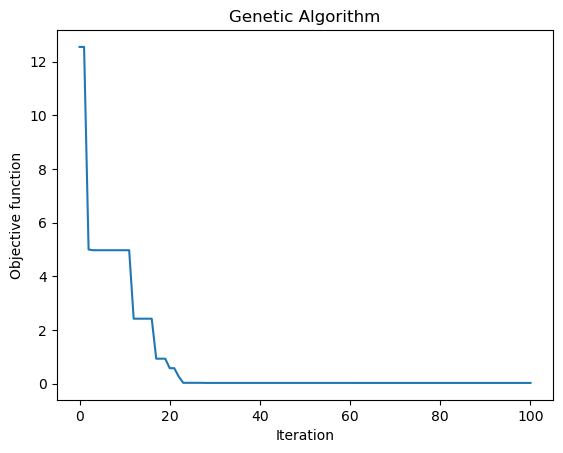

 The best solution found:                                                                           
 [1.42538348 1.99380844]

 Objective function:
 0.32466502265629954


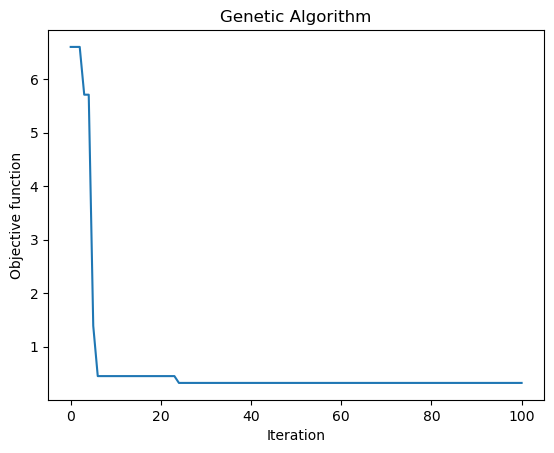

 The best solution found:                                                                           
 [-0.95632289  1.00188661]

 Objective function:
 4.589906938684985


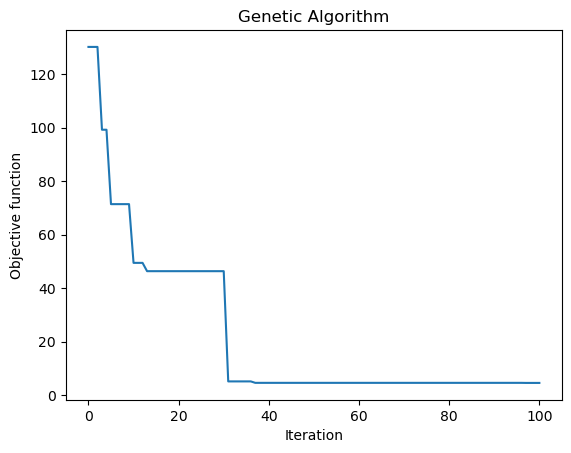

 The best solution found:                                                                           
 [1.102893   1.21294802]

 Objective function:
 0.011759999998042057


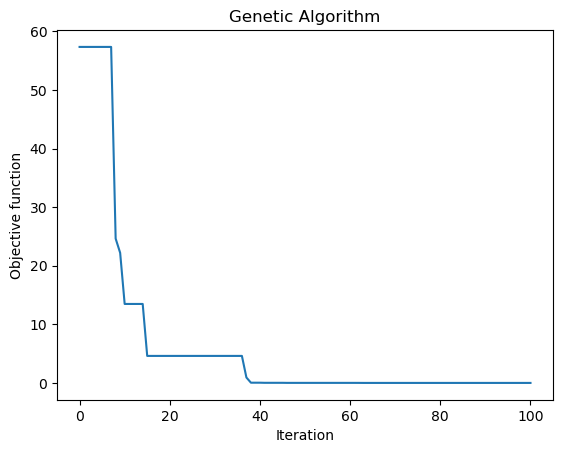

 The best solution found:                                                                           
 [0.96651647 1.00046036]

 Objective function:
 0.4407732032748401


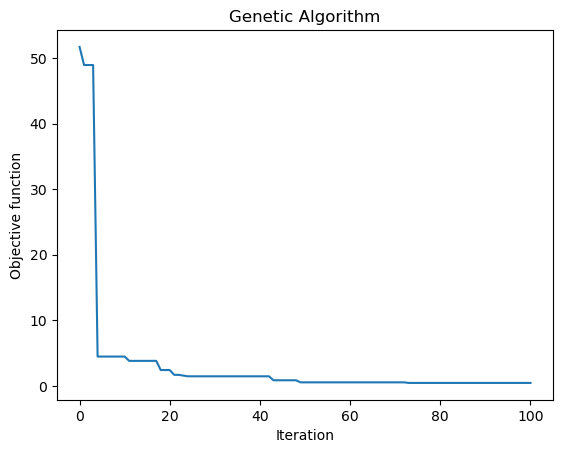

 The best solution found:                                                                           
 [1.01807371 1.03094071]

 Objective function:
 0.003388478424665021


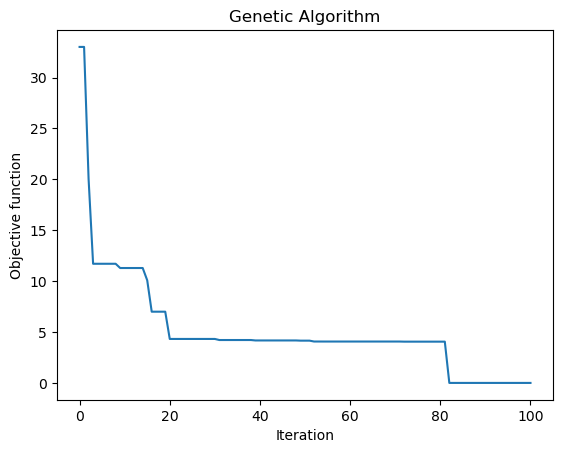

 The best solution found:                                                                           
 [0.90315115 1.00426596]

 Objective function:
 3.5657707977549276


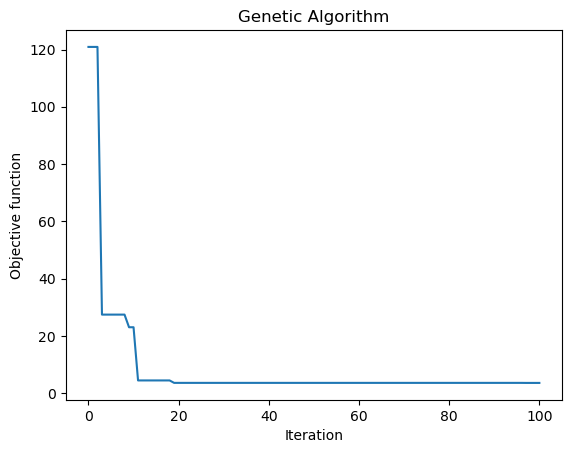

 The best solution found:                                                                           
 [1.04206526 1.08602191]

 Objective function:
 0.0017709723019287084


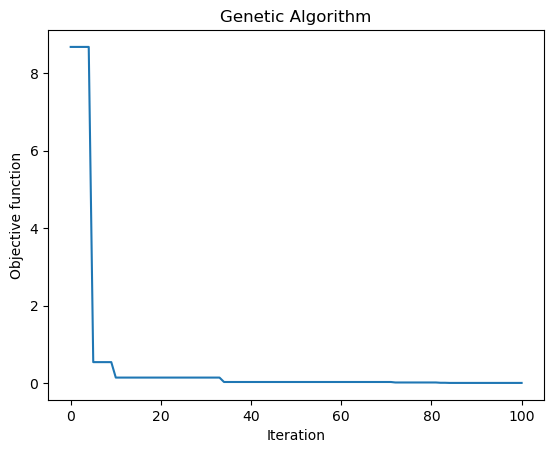

 The best solution found:                                                                           
 [1.07944231 1.16467241]

 Objective function:
 0.006338461838103155


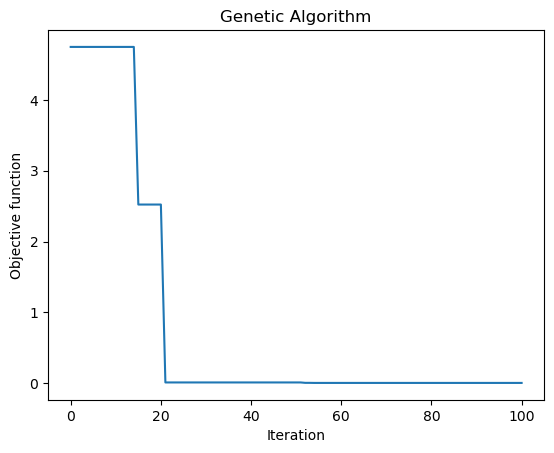

 The best solution found:                                                                           
 [1.00308064 1.00845182]

 Objective function:
 0.0005298133886021833


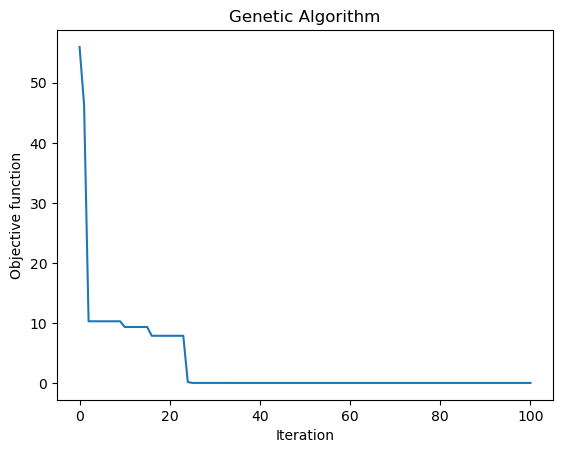

 The best solution found:                                                                           
 [1.04720727 1.09786581]

 Objective function:
 0.0023780368829362745


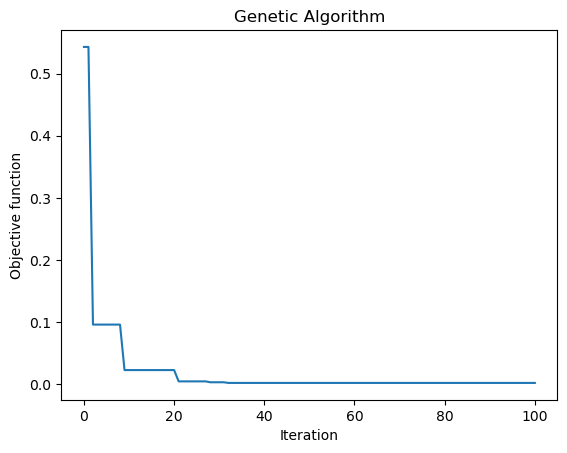

 The best solution found:                                                                           
 [1.04194595 1.08704246]

 Objective function:
 0.0019529755020181539


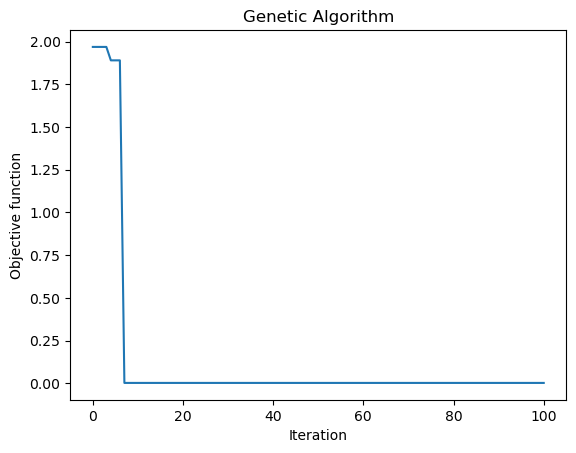

 The best solution found:                                                                           
 [-1.18661963  1.40930745]

 Objective function:
 4.7814595055122115


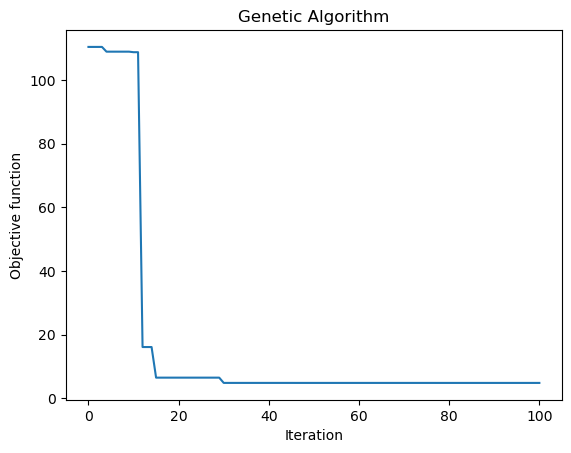

 The best solution found:                                                                           
 [-1.41597404  1.98792158]

 Objective function:
 5.866038006242073


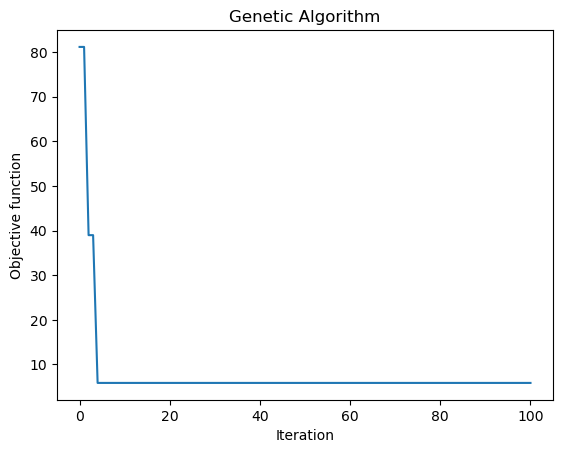

 The best solution found:                                                                           
 [1.23875274 1.53274383]

 Objective function:
 0.05731422256793735


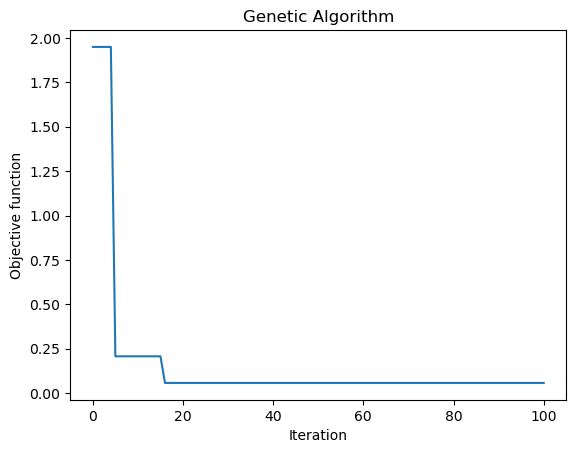

 The best solution found:                                                                           
 [1.10878281 1.22853153]

 Objective function:
 0.011909005365216292


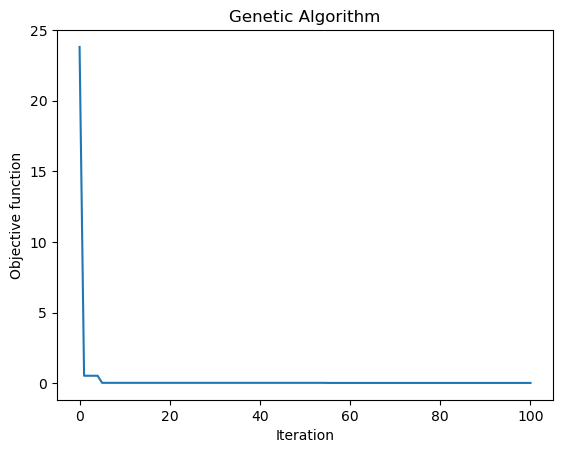

 The best solution found:                                                                           
 [1.03443417 1.07216479]

 Objective function:
 0.001631230198506083


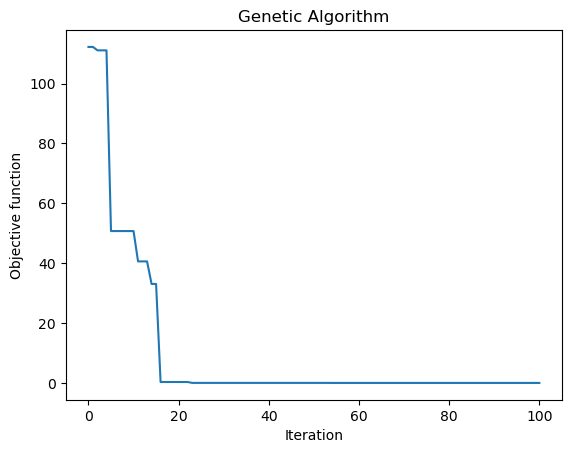

 The best solution found:                                                                           
 [1.31325624 1.72483927]

 Objective function:
 0.09813336465638312


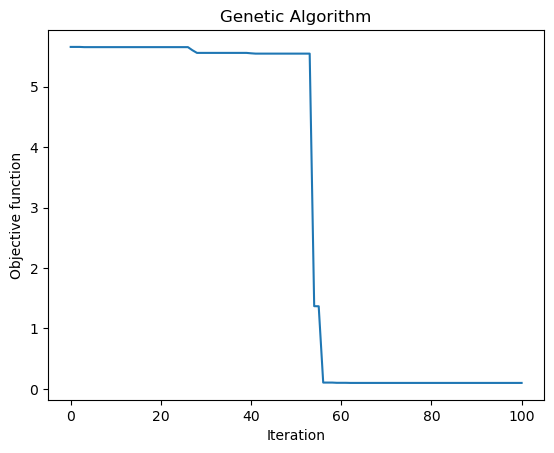

 The best solution found:                                                                           
 [1.22155552 1.49244287]

 Objective function:
 0.0490928506739684


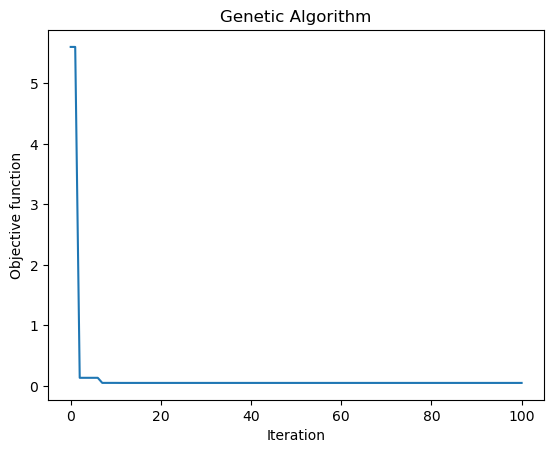

 The best solution found:                                                                           
 [-1.37834896  1.89366179]

 Objective function:
 5.660368035639051


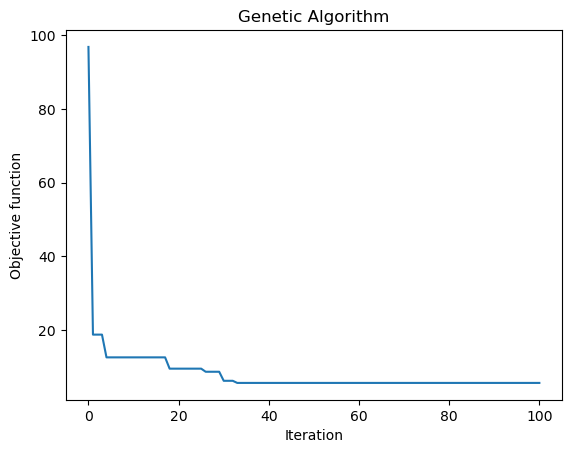

 The best solution found:                                                                           
 [0.9955219  1.00748323]

 Objective function:
 0.026979646650458263


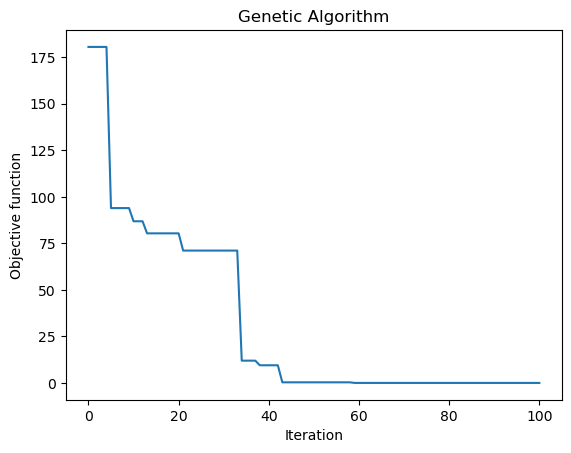

 The best solution found:                                                                           
 [1.08959563 1.20127836]

 Objective function:
 0.027794961486239125


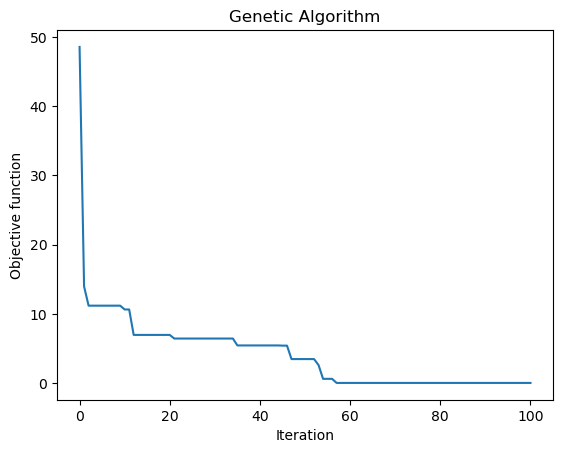

 The best solution found:                                                                           
 [0.97748949 1.01469247]

 Objective function:
 0.35105083945296844


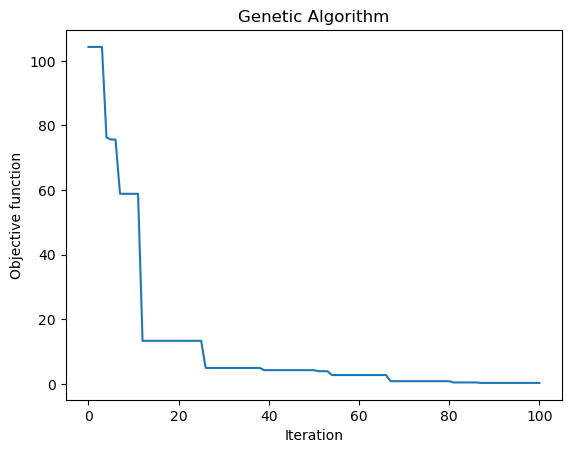

 The best solution found:                                                                           
 [1.06368751 1.12687495]

 Objective function:
 0.006131958721080287


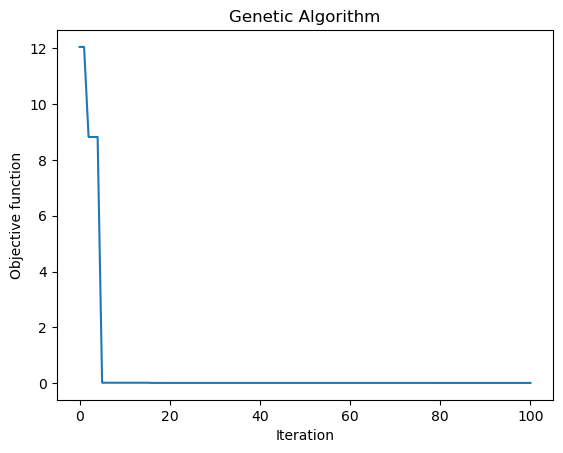

 The best solution found:                                                                           
 [1.12109286 1.25663337]

 Objective function:
 0.014668139056065767


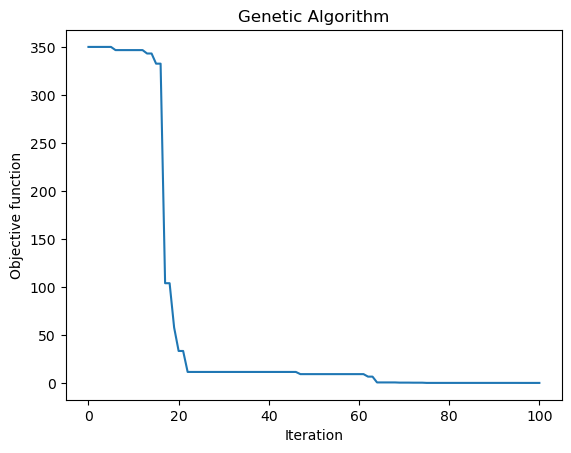

 The best solution found:                                                                           
 [1.16104766 1.34802461]

 Objective function:
 0.025936352212739388


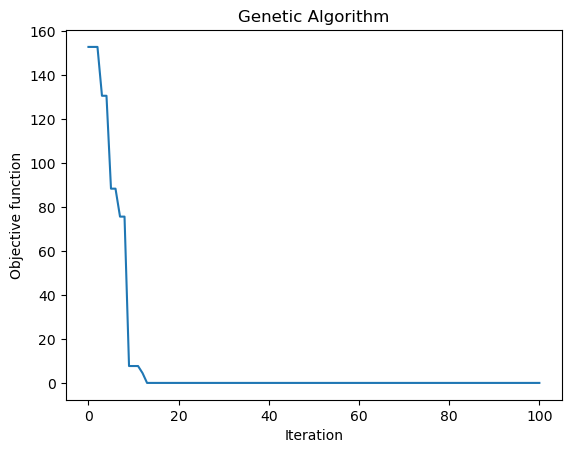

 The best solution found:                                                                           
 [0.93075243 1.00099872]

 Objective function:
 1.819167350048514


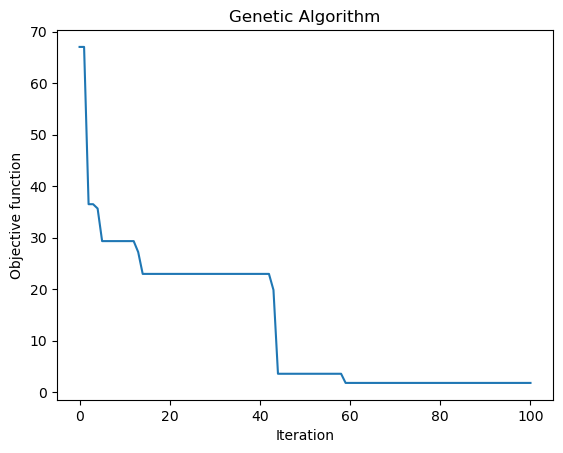

 The best solution found:                                                                           
 [1.08501384 1.17443966]

 Objective function:
 0.008019992638600707


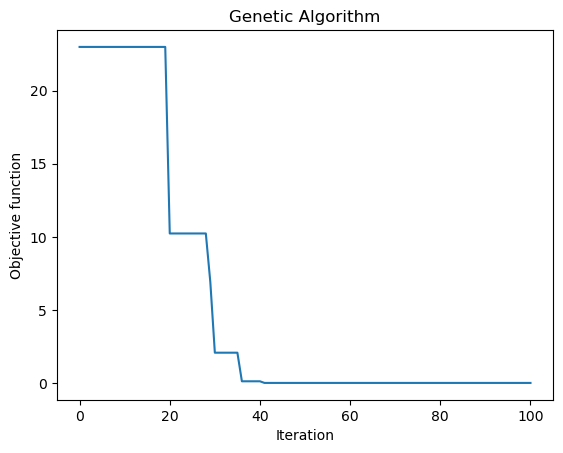

 The best solution found:                                                                           
 [1.1429458  1.30541531]

 Objective function:
 0.020516273318601574


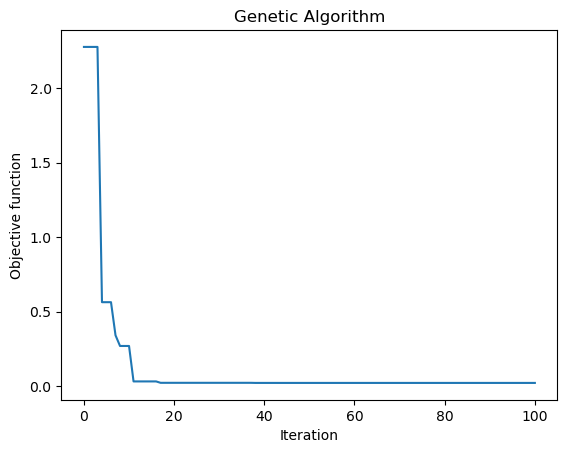

 The best solution found:                                                                           
 [1.11152676 1.23452989]

 Objective function:
 0.012530732650666766


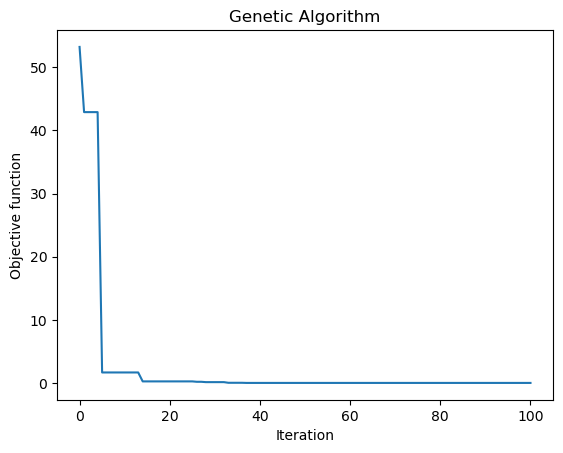

 The best solution found:                                                                           
 [1.04822872 1.10953456]

 Objective function:
 0.013884634550988678


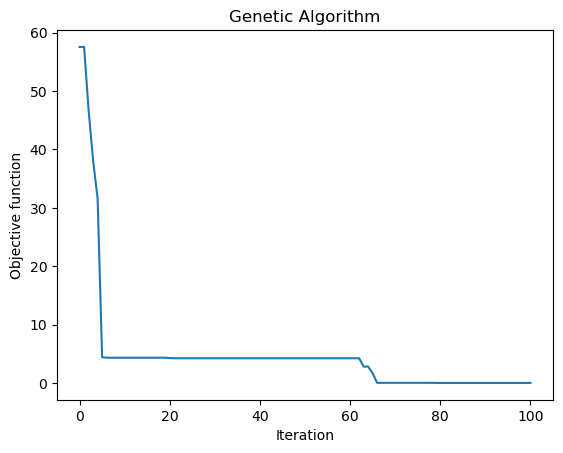

 The best solution found:                                                                           
 [1.24115162 1.54049214]

 Objective function:
 0.058154225272817446


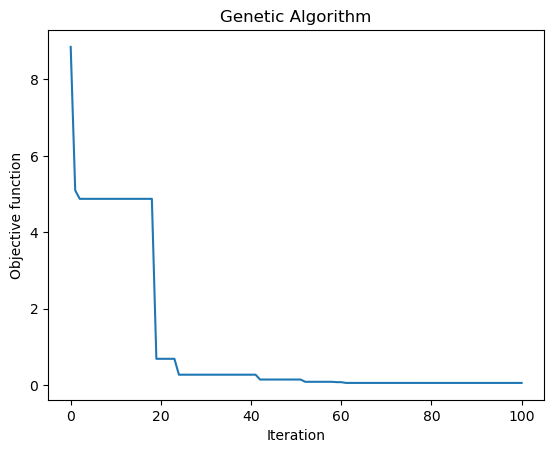

GA Algorithm - Mean Time: 0.35499191522598267 seconds, Variance Time: 0.00027504455692166515
GA Algorithm - Mean Value: 1.574844751483216, Variance Value: 7.799292742309337


In [9]:
dimension = 2
variable_type_mixed = np.array(['real', 'real'])
variable_boundaries = np.array([[-25, 25], [1, 2]])
algorithm_parameters = {'max_num_iteration': 100, 
                        'population_size': 30, 
                        'mutation_probability': 0.1, 
                        'elit_ratio': 0.1, 
                        'crossover_probability': 0.7, 
                        'parents_portion': 0.3, 
                        'crossover_type': 'uniform', 
                        'max_iteration_without_improv': None}

ga_times = []
ga_values = []

for _ in range(100):
    ga_result, ga_time = ga_optimization(f, dimension, variable_type_mixed, variable_boundaries, algorithm_parameters)

    ga_times.append(ga_time)
    ga_values.append(ga_result)

ga_mean_time = np.mean(ga_times)
ga_variance_time = np.var(ga_times)

ga_mean_value = np.mean(ga_values)
ga_variance_value = np.var(ga_values)

print(f"GA Algorithm - Mean Time: {ga_mean_time} seconds, Variance Time: {ga_variance_time}")
print(f"GA Algorithm - Mean Value: {ga_mean_value}, Variance Value: {ga_variance_value}")


In [10]:
def f(x):
    return -((1-x[0])**2 + 100*(x[1] - x[0]**2)**2)

def bees_optimization(func, lb, ub, max_iter=100, num_bees=30):
    start_time = time.time()
    optimizer = BeesAlgorithm(func, lb, ub)
    optimizer.performFullOptimisation(max_iter)
    end_time = time.time()
    best = optimizer.best_solution
    return best.score, end_time - start_time

max_iter = 100
num_bees = 30

bees_times = []
bees_values = []

for _ in range(100):
    bees_result, bees_time = bees_optimization(f, lb, ub, max_iter, num_bees)

    bees_times.append(bees_time)
    bees_values.append(bees_result)

bees_mean_time = np.mean(bees_times)
bees_variance_time = np.var(bees_times)

bees_mean_value = np.mean(bees_values)
bees_variance_value = np.var(bees_values)

print(f"Bees Algorithm - Mean Time: {bees_mean_time} seconds, Variance Time: {bees_variance_time}")
print(f"Bees Algorithm - Mean Value: {bees_mean_value}, Variance Value: {bees_variance_value}")


Bees Algorithm - Mean Time: 0.03471440076828003 seconds, Variance Time: 1.5315631678447517e-06
Bees Algorithm - Mean Value: -0.0034544691106717386, Variance Value: 5.902949064820461e-05


In [11]:
def de_optimization(func, bounds, maxiter=100, strategy='best1bin', mutation=(0.5, 1), recombination=0.7, disp=False):
    start_time = time.time()
    result = differential_evolution(func, bounds, strategy=strategy, maxiter=maxiter, mutation=mutation, recombination=recombination, disp=disp)
    end_time = time.time()
    return result.fun, end_time - start_time

def f(x):
    return (1-x[0])**2 + 100*(x[1] - x[0]**2)**2

bounds = [(-25, 25), (1, 2)]
maxiter = 100
strategy = 'best1bin'
mutation = (0.5, 1)
recombination = 0.7
disp = False

de_times = []
de_values = []

for _ in range(100):
    de_result, de_time = de_optimization(f, bounds, maxiter, strategy, mutation, recombination, disp)

    de_times.append(de_time)
    de_values.append(de_result)

de_mean_time = np.mean(de_times)
de_variance_time = np.var(de_times)

de_mean_value = np.mean(de_values)
de_variance_value = np.var(de_values)

print(f"DE Algorithm - Mean Time: {de_mean_time} seconds, Variance Time: {de_variance_time}")
print(f"DE Algorithm - Mean Value: {de_mean_value}, Variance Value: {de_variance_value}")


DE Algorithm - Mean Time: 0.07577596426010132 seconds, Variance Time: 0.0001414660595335761
DE Algorithm - Mean Value: 0.15959899242436615, Variance Value: 0.6113241211889491


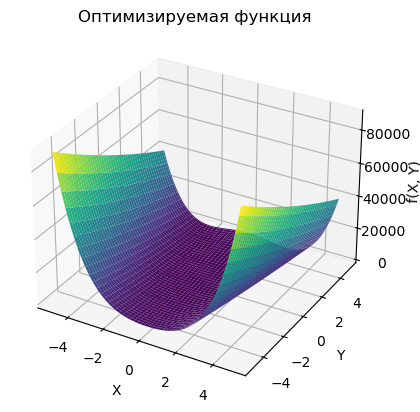

In [12]:
def f(x):
    return (1-x[0])**2 + 100*(x[1] - x[0]**2)**2

x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = (1-X)**2 + 100*(Y - X**2)**2

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('f(X, Y)')
ax.set_title('Оптимизируемая функция')
plt.show()


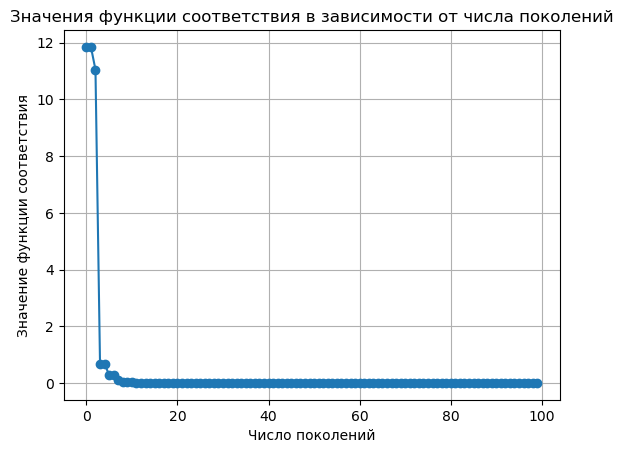

In [13]:
# Реализация алгоритма дифференциальной эволюции с сохранением значений функции соответствия
def de_optimization(func, bounds, maxiter=100, strategy='best1bin', mutation=(0.5, 1), recombination=0.7, disp=False):
    result = differential_evolution(func, bounds, strategy=strategy, maxiter=maxiter, mutation=mutation, recombination=recombination, disp=disp, callback=callback)
    return result.fun

# Callback функция для сохранения значений функции соответствия на каждом поколении
generation_values = []

def callback(xk, convergence):
    generation_values.append(f(xk))

# Параметры для алгоритма дифференциальной эволюции
bounds = [(-25, 25), (1, 2)]
maxiter = 100
strategy = 'best1bin'
mutation = (0.5, 1)
recombination = 0.7
disp = False

# Выполнение оптимизации
de_optimization(f, bounds, maxiter, strategy, mutation, recombination, disp)

# Визуализация значений функции соответствия в зависимости от числа поколений
plt.figure()
plt.plot(range(len(generation_values)), generation_values, marker='o')
plt.xlabel('Число поколений')
plt.ylabel('Значение функции соответствия')
plt.title('Значения функции соответствия в зависимости от числа поколений')
plt.grid(True)
plt.show()


 The best solution found:                                                                           
 [1.21777759 1.48498241]

 Objective function:
 0.047827141244636044


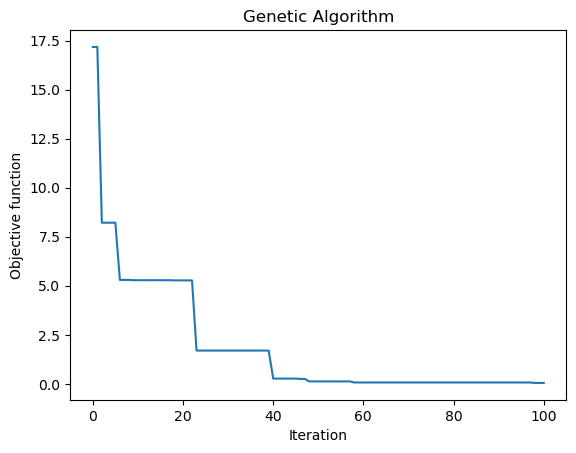

In [14]:
def ga_optimization(func, dimension, variable_type_mixed, variable_boundaries, algorithm_parameters):
    model = ga(function=func, dimension=dimension, variable_type_mixed=variable_type_mixed,
               variable_boundaries=variable_boundaries, algorithm_parameters=algorithm_parameters)
    model.run()
    return model.report

dimension = 2
variable_type_mixed = np.array(['real', 'real'])
variable_boundaries = np.array([(-25, 25), (1, 2)])
algorithm_parameters = {'max_num_iteration': 100, 'population_size': 30, 'mutation_probability': 0.1, 'elit_ratio': 0.01,
                        'crossover_probability': 0.5, 'parents_portion': 0.3, 'crossover_type': 'uniform',
                        'max_iteration_without_improv': None}

generation_values = []

def callback(ga_instance):
    generation_values.append(ga_instance.best_function)

report = ga_optimization(f, dimension, variable_type_mixed, variable_boundaries, algorithm_parameters)


Stopping search: maximum iterations reached --> 0
Stopping search: maximum iterations reached --> 1
Stopping search: maximum iterations reached --> 2
Stopping search: maximum iterations reached --> 3
Stopping search: maximum iterations reached --> 4
Stopping search: maximum iterations reached --> 5
Stopping search: maximum iterations reached --> 6
Stopping search: maximum iterations reached --> 7
Stopping search: maximum iterations reached --> 8
Stopping search: maximum iterations reached --> 9
Stopping search: maximum iterations reached --> 10
Stopping search: maximum iterations reached --> 11
Stopping search: maximum iterations reached --> 12
Stopping search: maximum iterations reached --> 13
Stopping search: maximum iterations reached --> 14
Stopping search: maximum iterations reached --> 15
Stopping search: maximum iterations reached --> 16
Stopping search: maximum iterations reached --> 17
Stopping search: maximum iterations reached --> 18
Stopping search: maximum iterations reach

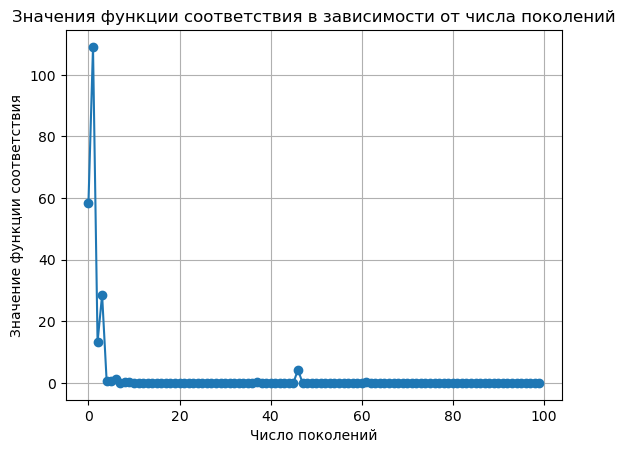

In [15]:
def pso_optimization(func, lb, ub, swarmsize=30, maxiter=100):
    result = pso(func, lb, ub, swarmsize=swarmsize, maxiter=maxiter)
    return result
swarmsize = 30
maxiter = 100


generation_values = []
for i in range(100):
    pso_result = pso_optimization(f, lb, ub, swarmsize, i)
    generation_values.append(f(pso_result[0]))

plt.figure()
plt.plot(range(len(generation_values)), generation_values, marker='o')
plt.xlabel('Число поколений')
plt.ylabel('Значение функции соответствия')
plt.title('Значения функции соответствия в зависимости от числа поколений')
plt.grid(True)
plt.show()

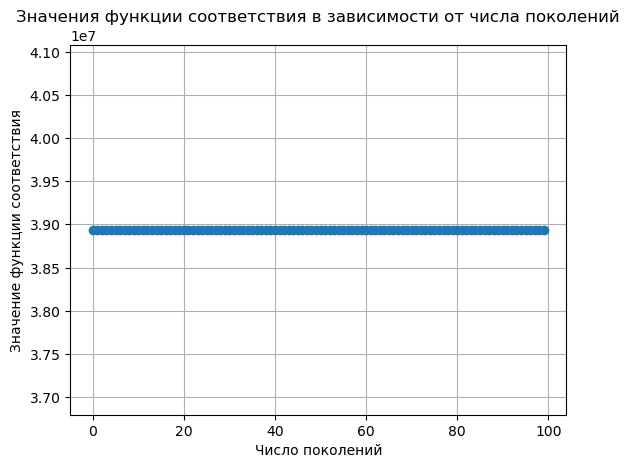

In [16]:

def f(x):
    return -(1-x[0])**2 + 100*(x[1] - x[0]**2)**2

def f_true(x):
    return (1-x[0])**2 + 100*(x[1] - x[0]**2)**2

def bees_optimization(func, lb, ub, max_iter=100, num_bees=30):

    optimizer = BeesAlgorithm(func, lb, ub)
    optimizer.performFullOptimisation(max_iter)

    best = optimizer.best_solution
    return best.values

max_iter = 100
num_bees = 30

generation_values = []

for _ in range(100):
    bees_result = bees_optimization(f, lb, ub, i, num_bees)

    generation_values.append(f(bees_result))

plt.figure()
plt.plot(range(len(generation_values)), generation_values, marker='o')
plt.xlabel('Число поколений')
plt.ylabel('Значение функции соответствия')
plt.title('Значения функции соответствия в зависимости от числа поколений')
plt.grid(True)
plt.show()


In [17]:
df = pd.DataFrame({
    'alg': ['Newton', 'Gen', 'PSO', 'Bees', 'Diff'],
    'mean_time': [newton_cg_mean_time, ga_mean_time, pso_mean_time, bees_mean_time, de_mean_time],
    'var_time': [newton_variance, ga_variance_time, pso_variance, bees_variance_time, de_variance_time],
    'mean_value': [newton_mean, ga_mean_value, pso_mean_value, bees_mean_value, de_mean_value],
    'var_value': [newton_variance, ga_variance_value, pso_variance, bees_variance_value, de_variance_value]
})

In [18]:
df

,alg,mean_time,var_time,mean_value,var_value
0,Newton,0.002463,0.746452,0.179409,0.746452
1,Gen,0.354992,0.000275,1.574845,7.799293
2,PSO,0.035459,0.001791,0.042814,0.001791
3,Bees,0.034714,0.000002,-0.003454,0.000059
4,Diff,0.075776,0.000141,0.159599,0.611324


 The best solution found:                                                                           
 [44.9910066   0.11754138]

 Objective function:
 -0.9833333333333333


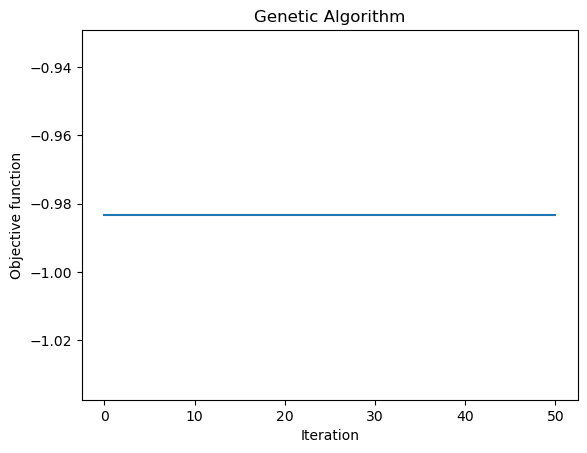

 The best solution found:                                                                           
 [1.]

 Objective function:
 -0.9666666666666667


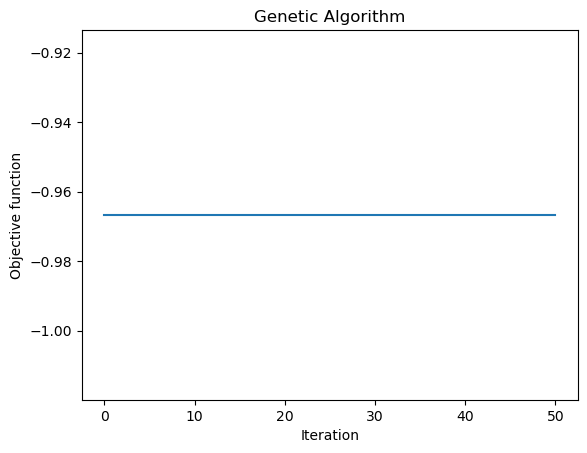

 The best solution found:                                                                           
 [84. 26.]

 Objective function:
 -0.9666666666666667


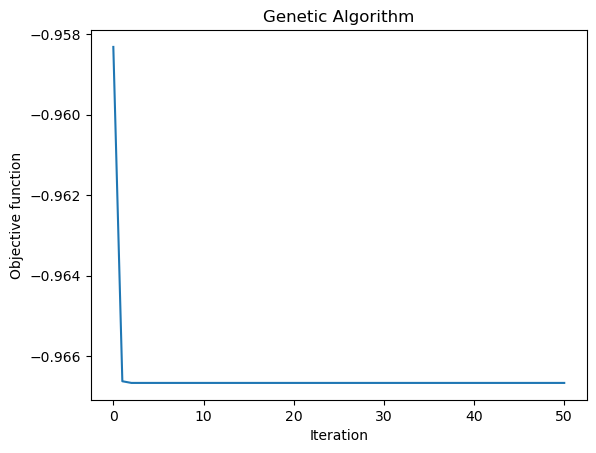

Оптимальные параметры для SVM: C=44.991006604557455, gamma=0.11754138089335447
Оптимальные параметры для KNN: n_neighbors=1
Оптимальные параметры для RF: n_estimators=84, max_depth=26


In [19]:

data = load_iris()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Определение целевой функции для SVM
def svm_objective(params):
    C, gamma = params
    model = SVC(C=C, gamma=gamma, kernel='rbf')
    model.fit(X_test, y_test)
    y_preds = model.predict(X_train)
    scores = f1_score(y_train, y_preds, average='weighted')
    return -scores  # Минимизируем отрицательную точность

# Определение целевой функции для KNN
def knn_objective(params):
    n_neighbors, = params
    model = KNeighborsClassifier(n_neighbors=int(n_neighbors))
    model.fit(X_test, y_test)
    y_preds = model.predict(X_train)
    scores = f1_score(y_train, y_preds, average='weighted')
    return -scores  # Минимизируем отрицательную точность

# Определение целевой функции для RF
def rf_objective(params):
    n_estimators, max_depth = params
    model = RandomForestClassifier(n_estimators=int(n_estimators), max_depth=int(max_depth))
    model.fit(X_test, y_test)
    y_preds = model.predict(X_train)
    scores = f1_score(y_train, y_preds, average='weighted')
    return -scores  # Минимизируем отрицательную точность

# Параметры для генетического алгоритма
algorithm_parameters = {
    'max_num_iteration': 50,
    'population_size': 30,
    'mutation_probability': 0.1,
    'elit_ratio': 0.01,
    'crossover_probability': 0.5,
    'parents_portion': 0.3,
    'crossover_type': 'uniform',
    'max_iteration_without_improv': None
}

# Оптимизация параметров для SVM
svm_variable_boundaries = np.array([[0.1, 100], [0.001, 1]])
svm_model = ga(function=svm_objective, dimension=2, variable_type_mixed=np.array(['real', 'real']),
               variable_boundaries=svm_variable_boundaries, algorithm_parameters=algorithm_parameters)
svm_model.run()
svm_best_params = svm_model.best_variable

# Оптимизация параметров для KNN
knn_variable_boundaries = np.array([[1, 20]])
knn_model = ga(function=knn_objective, dimension=1, variable_type_mixed=np.array(['int']),
               variable_boundaries=knn_variable_boundaries, algorithm_parameters=algorithm_parameters)
knn_model.run()
knn_best_params = knn_model.best_variable

# Оптимизация параметров для RF
rf_variable_boundaries = np.array([[10, 200], [1, 50]])
rf_model = ga(function=rf_objective, dimension=2, variable_type_mixed=np.array(['int', 'int']),
              variable_boundaries=rf_variable_boundaries, algorithm_parameters=algorithm_parameters)
rf_model.run()
rf_best_params = rf_model.best_variable

# Вывод оптимальных параметров
print(f"Оптимальные параметры для SVM: C={svm_best_params[0]}, gamma={svm_best_params[1]}")
print(f"Оптимальные параметры для KNN: n_neighbors={int(knn_best_params[0])}")
print(f"Оптимальные параметры для RF: n_estimators={int(rf_best_params[0])}, max_depth={int(rf_best_params[1])}")
